<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/_EDUCACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np
import pylab as pl
from pandas.plotting import scatter_matrix 
from matplotlib import cm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings

from google.colab import files 
import io

In [2]:
upload = files.upload()

Saving %ESCUELA.xls to %ESCUELA.xls


In [3]:
df_Escuela=pd.read_excel(io.BytesIO(upload["%ESCUELA.xls"]), header=0)#df con los datos de la población
df_Escuela

AÑO             EDO                             ESCOLARIDAD  Total  \
0     2000  Aguascalientes                                   Total     17   
1     2000  Aguascalientes                     Primaria incompleta      4   
2     2000  Aguascalientes                       Primaria completa      5   
3     2000  Aguascalientes                Secundaria o equivalente      3   
4     2000  Aguascalientes    Bachillerato o preparatoria completo      1   
...    ...             ...                                     ...    ...   
7446  2021       Zacatecas  Bachillerato o preparatoria incompleto    132   
7447  2021       Zacatecas    Bachillerato o preparatoria completo    143   
7448  2021       Zacatecas                             Profesional     89   
7449  2021       Zacatecas                                Posgrado      2   
7450  2021       Zacatecas                         No especificada    174   

      Hombre  Mujer  
0       13.0    4.0  
1        3.0    1.0  
2        3.0    2.0  
3        3.0    NaN  
4        NaN    1.0  
...      ...    ...  
7446   120.0   12.0  
7447   129.0   14.0  
7448    80.0    9.0  
7449     NaN    2.0  
7450   141.0   15.0  

[7451 rows x 6 columns]

In [4]:
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [5]:
df_Escuela.fillna(0, inplace=True)

In [6]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask1 =  (df_Escuela['ESCOLARIDAD'] == 'Total') | (df_Escuela['ESCOLARIDAD'] == 'No aplica a menores de 6 años') |(df_Escuela['ESCOLARIDAD'] == 'No aplica a menor de 3 años') 

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_Escuela = df_Escuela.drop(df_Escuela[mask1].index)


In [ ]:
df_Escuela['ESCOLARIDAD'].unique()

array(['Primaria incompleta', 'Primaria completa',
       'Secundaria o equivalente', 'Bachillerato o preparatoria completo',
       'Profesional', 'No especificada', 'Sin escolaridad',
       'Secundaria incompleta', 'Bachillerato o preparatoria incompleto',
       'Preescolar', 'Posgrado'], dtype=object)

In [7]:
# creas un diccionario que asocia cada categoría con un número
escolaridad_dict = {
    'Sin escolaridad':0,
    'Preescolar':1,
    'Primaria incompleta': 2,
    'Primaria completa': 3,
    'Secundaria incompleta': 4,
    'Secundaria o equivalente': 5,
    'Bachillerato o preparatoria incompleto': 6,
    'Bachillerato o preparatoria completo': 7,
    'Profesional': 8,
    'Posgrado': 9,
    'No especificada':10,

}

# usas la función replace para asignar un número a cada categoría
df_Escuela['ESCOLARIDAD'] = df_Escuela['ESCOLARIDAD'].replace(escolaridad_dict)

##% edos con tasas bajas

In [8]:
# crear lista de estados
estados1 = ['Yucatán', 'Hildalgo', 'Aguascalientes']

# filtrar el dataframe por los estados deseados
df_bajos = df_Escuela[df_Escuela['EDO'].isin(estados1)]
df_bajos

AÑO             EDO  ESCOLARIDAD  Total  Hombre  Mujer
1     2000  Aguascalientes            2      4     3.0    1.0
2     2000  Aguascalientes            3      5     3.0    2.0
3     2000  Aguascalientes            5      3     3.0    0.0
4     2000  Aguascalientes            7      1     0.0    1.0
5     2000  Aguascalientes            8      2     2.0    0.0
...    ...             ...          ...    ...     ...    ...
7433  2021         Yucatán            5     12    10.0    2.0
7434  2021         Yucatán            6      3     2.0    1.0
7435  2021         Yucatán            7      7     6.0    1.0
7436  2021         Yucatán            8      6     5.0    1.0
7437  2021         Yucatán           10      1     0.0    1.0

[350 rows x 6 columns]

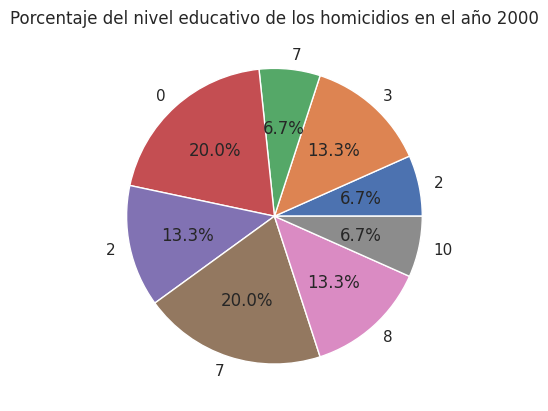

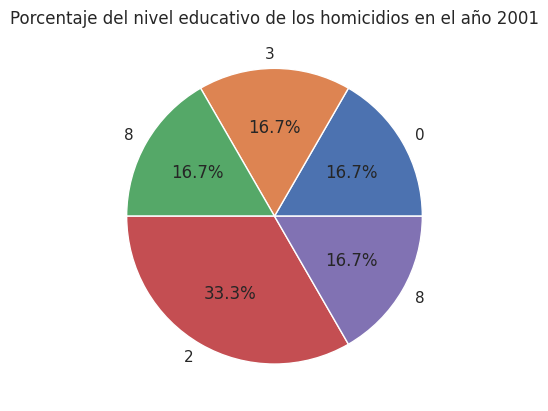

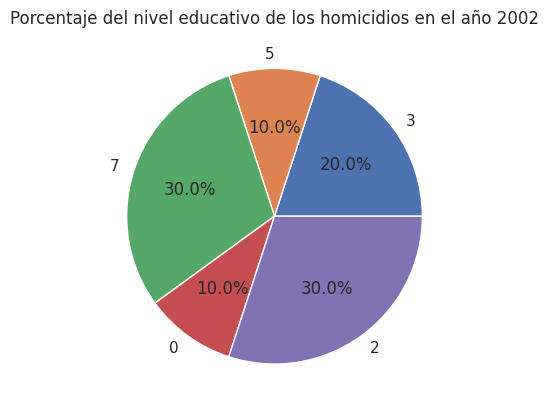

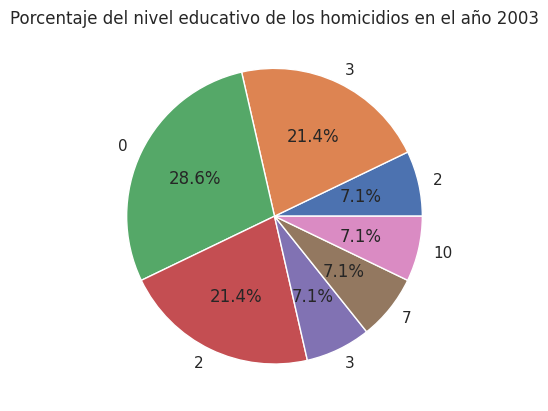

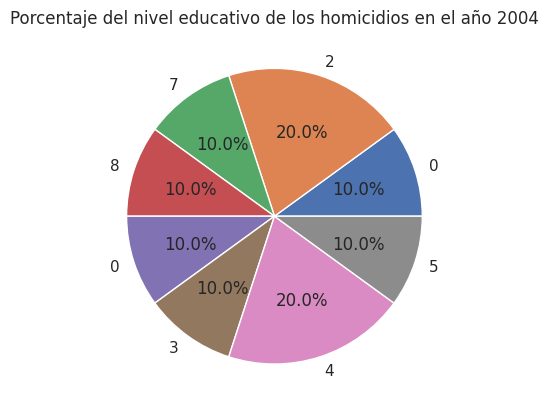

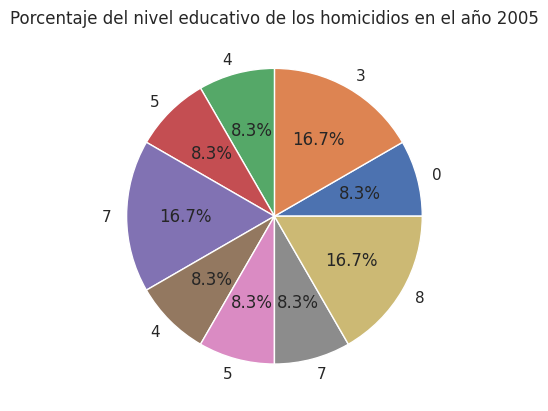

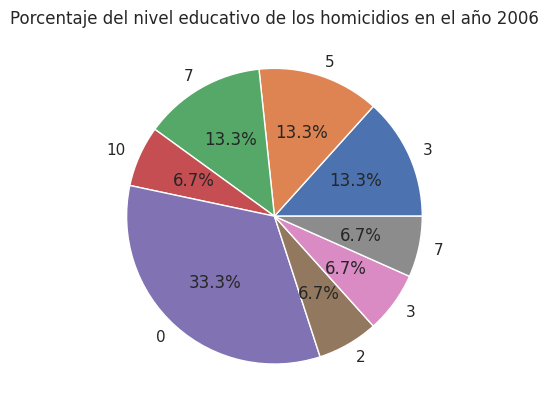

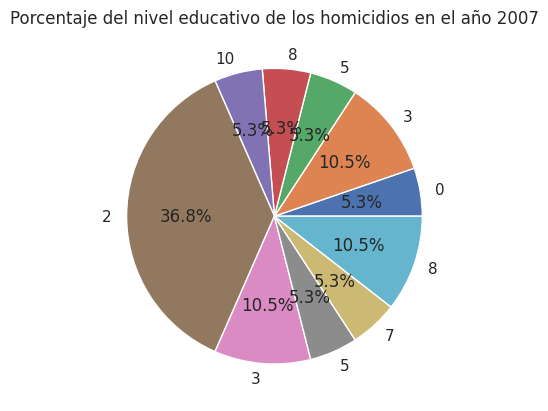

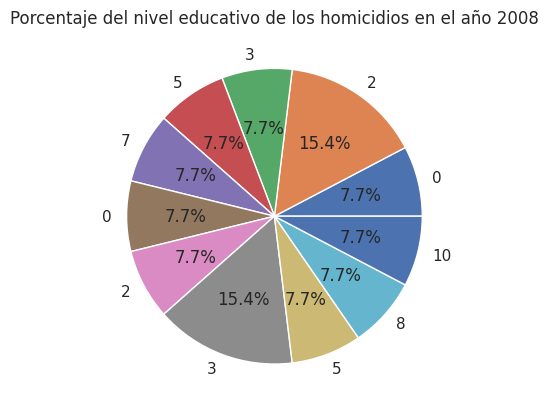

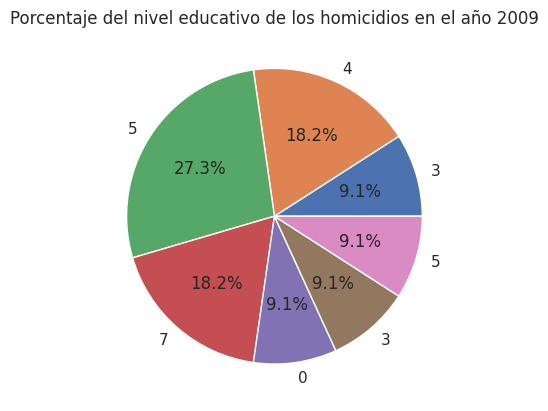

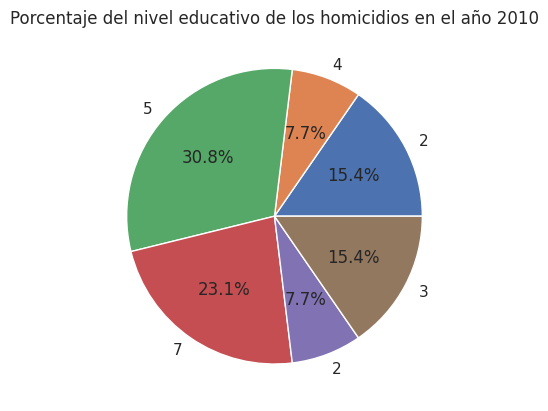

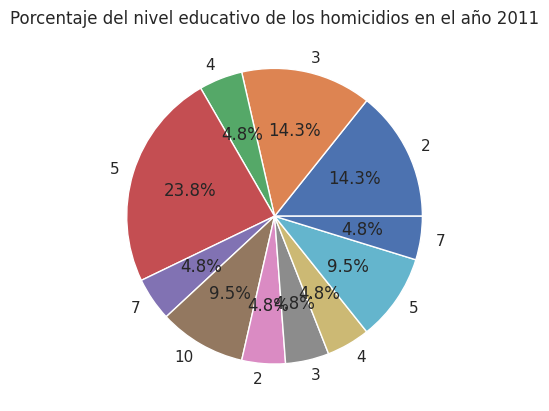

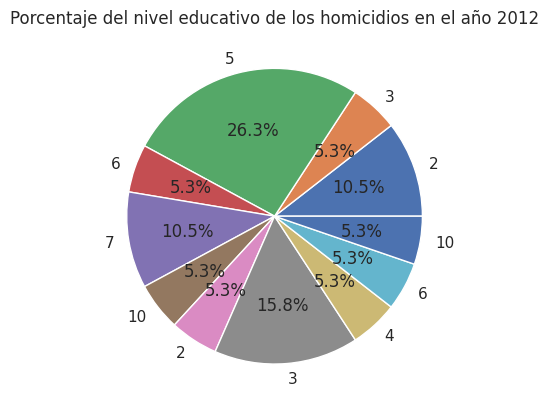

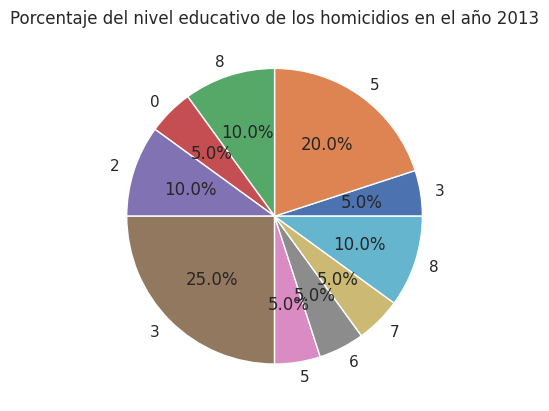

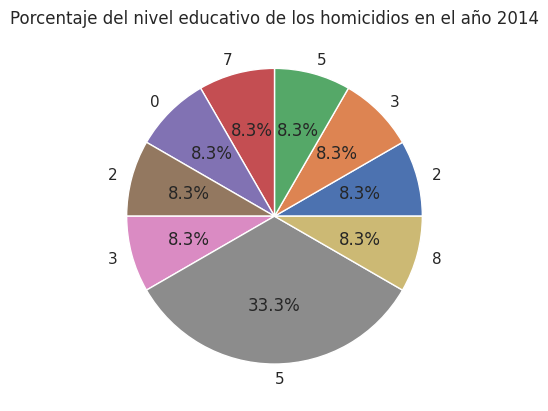

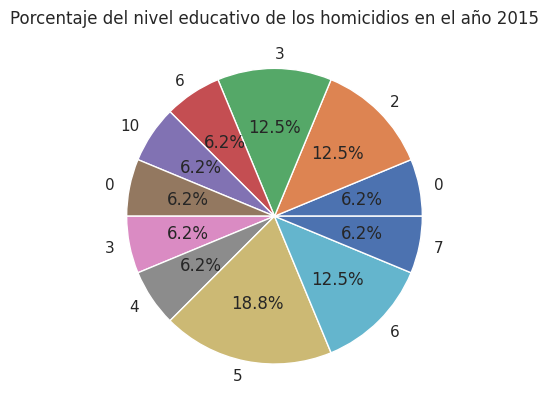

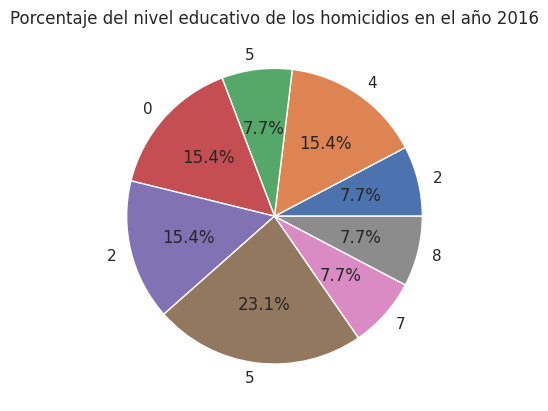

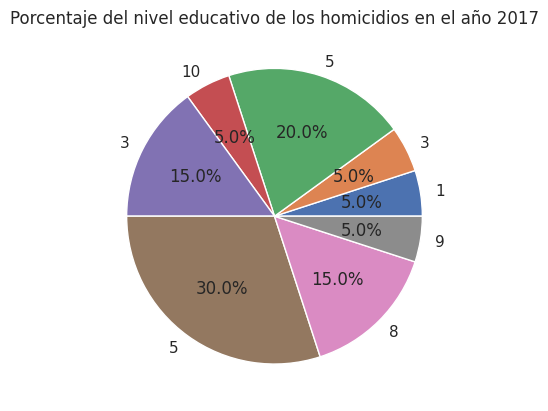

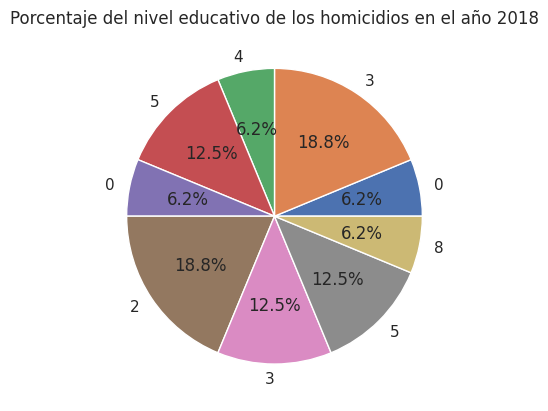

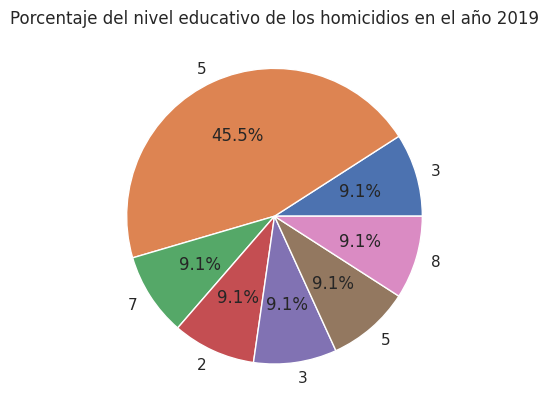

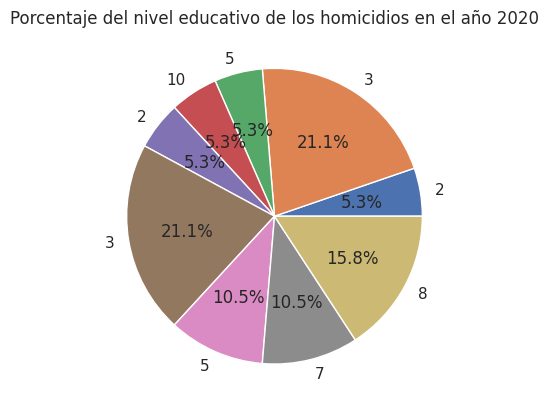

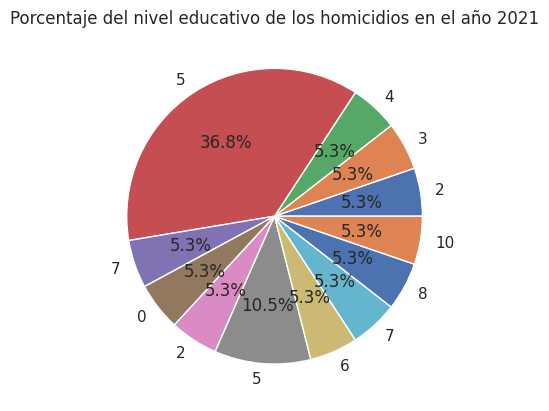

In [ ]:
df_Yucatán=df_bajos.copy()
Yucatán = ['Yucatán']
# Iterar sobre los años y crear una gráfica circular para cada uno
for year in df_Yucatán['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Yucatán.loc[df_Yucatán['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()

##Aguascalientes

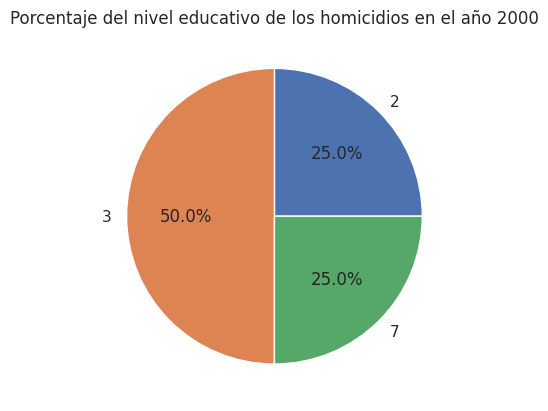

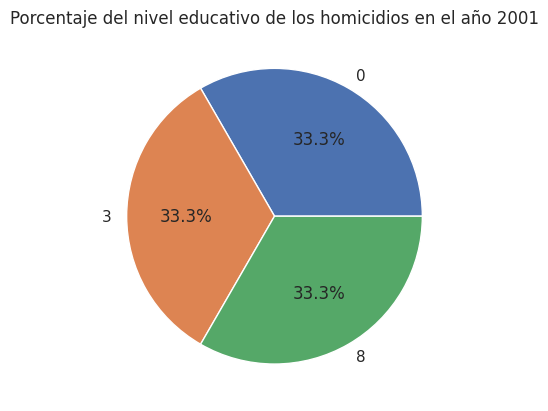

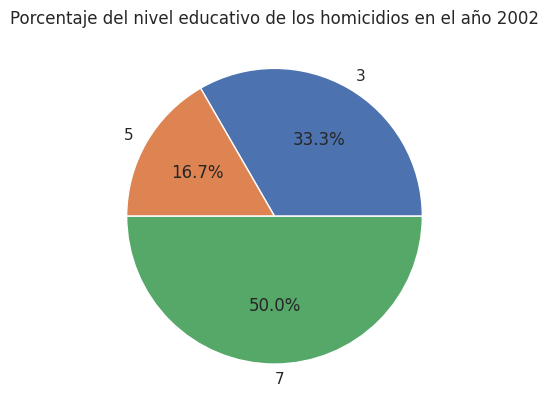

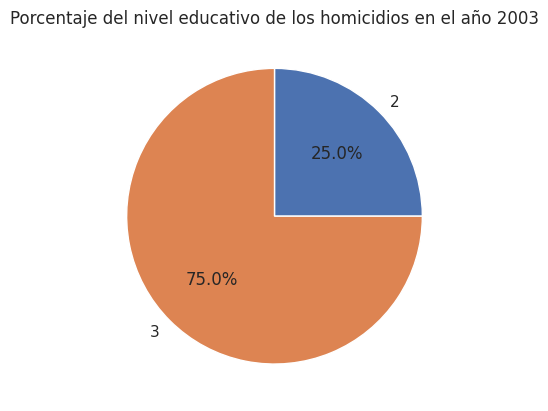

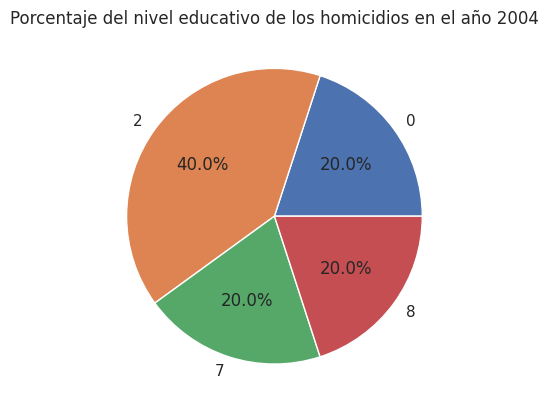

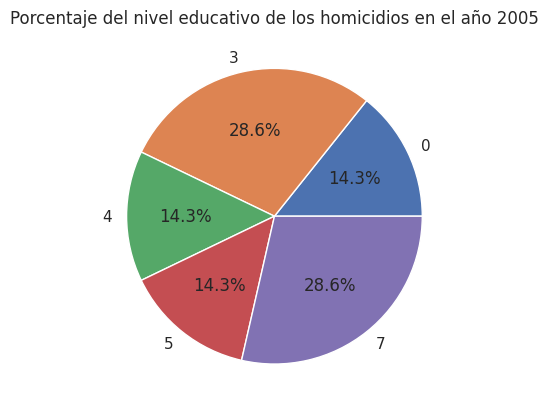

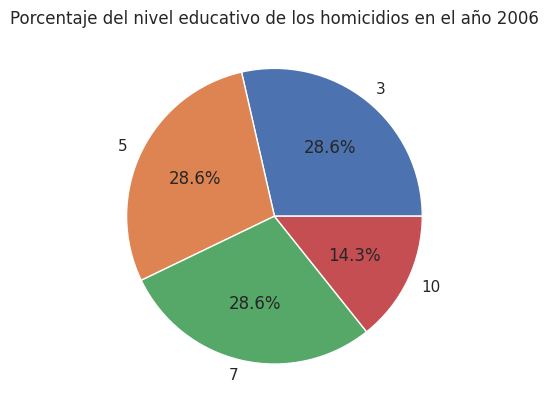

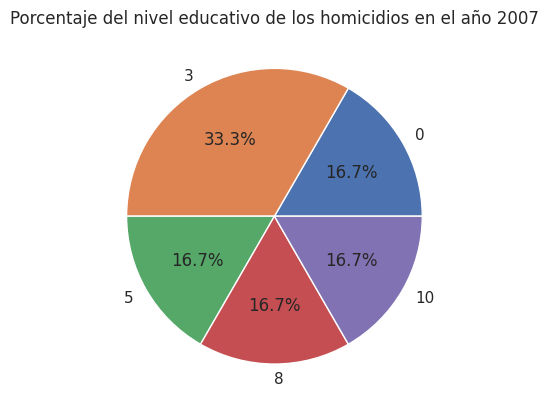

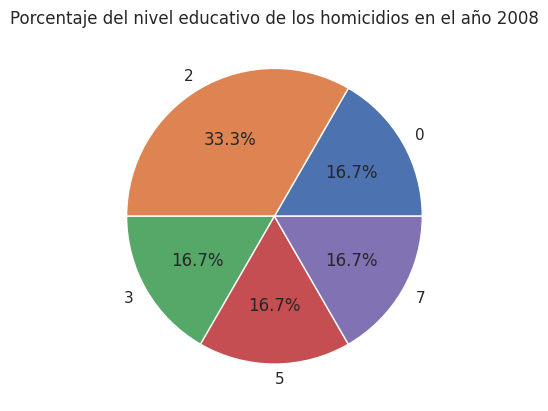

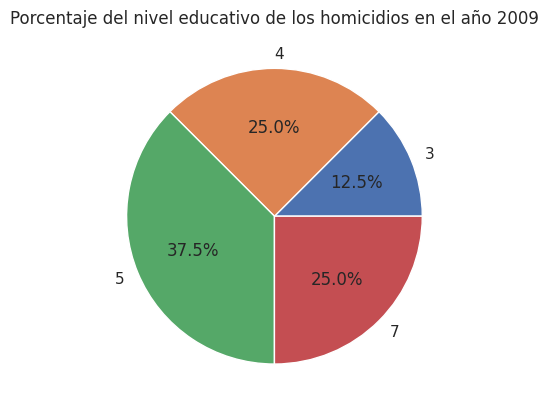

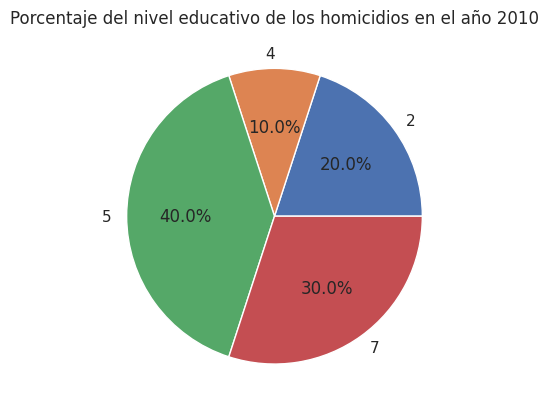

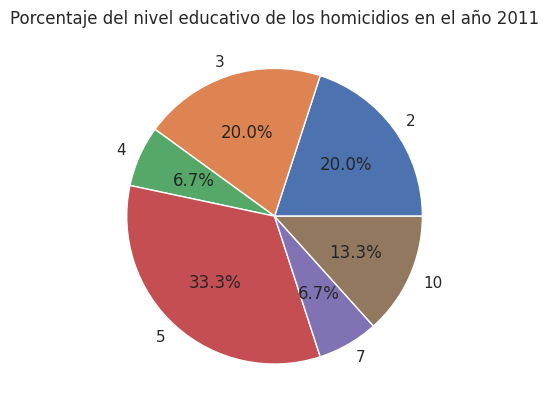

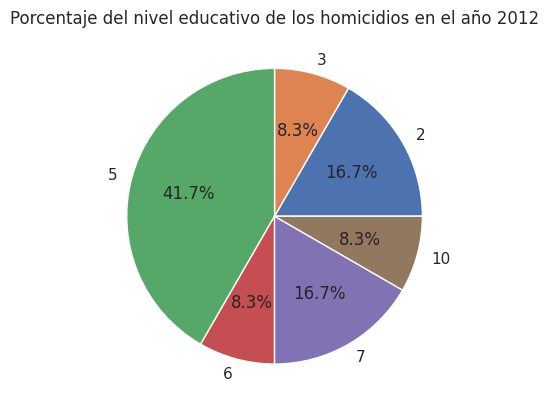

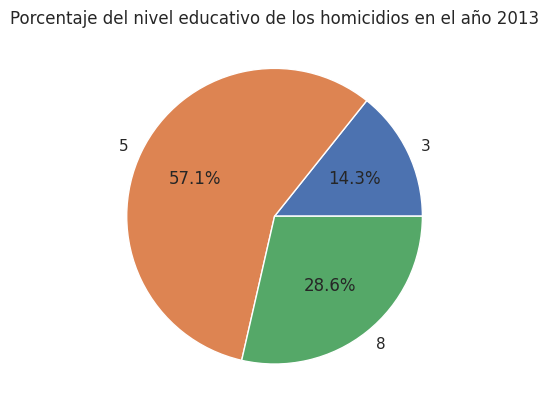

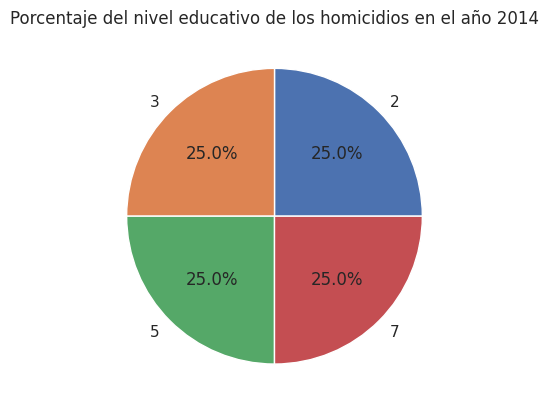

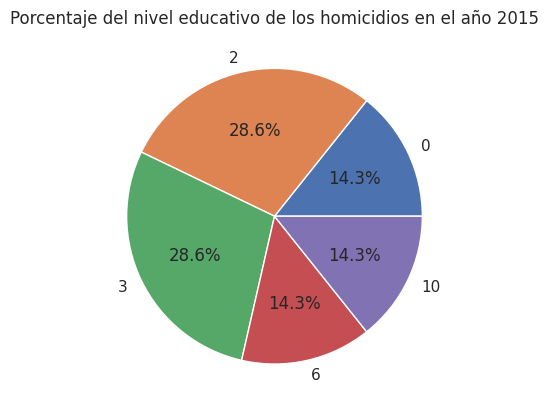

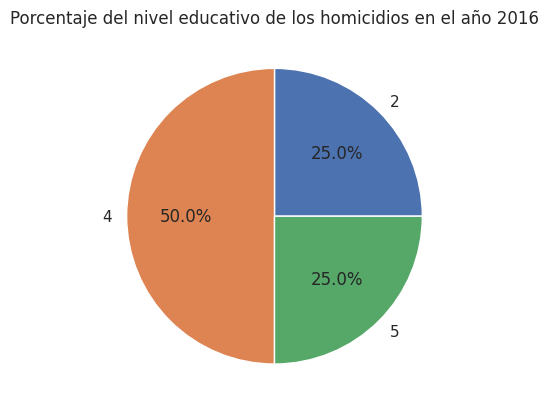

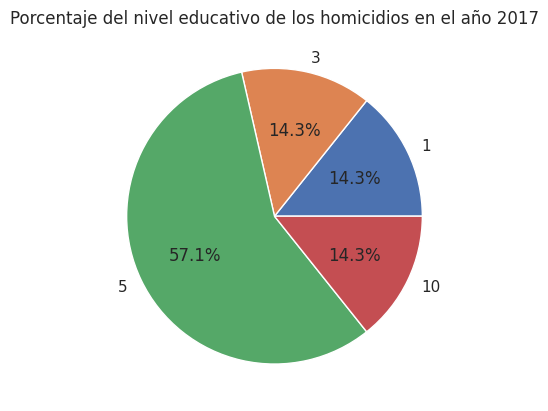

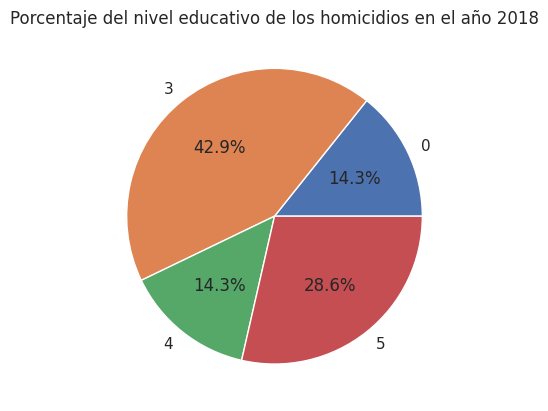

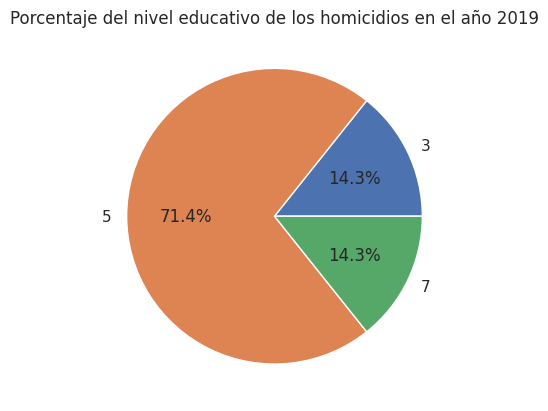

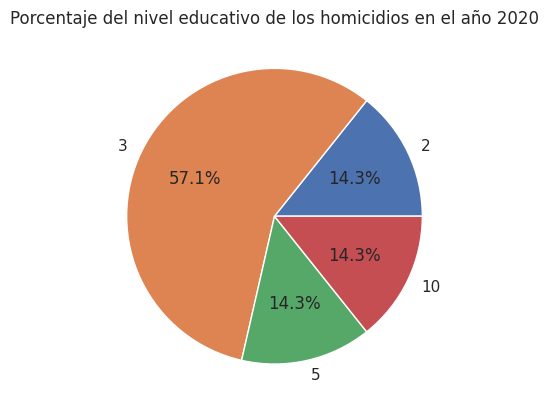

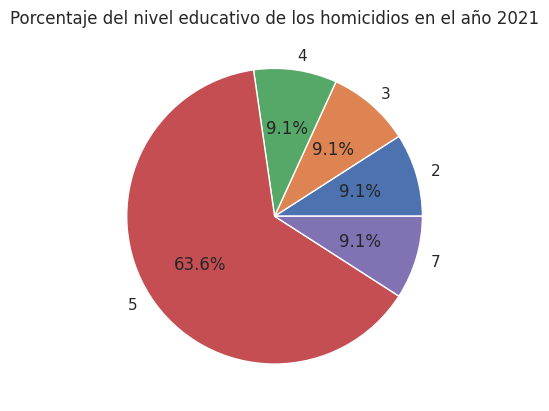

In [ ]:
df_Aguascalientes=df_bajos.copy()
Aguascalientes = ['Aguascalientes']
# Iterar sobre los años y crear una gráfica circular para cada uno
for year in df_Aguascalientes['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Aguascalientes.loc[df_Aguascalientes['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()


##% edos con tasas ALTAS

In [13]:
# crear lista de estados
estados = ['Zacatecas', 'Guerrero', 'Colima', 'México', 'Oaxaca', 'Quintana Roo', 'Baja California Sur', 'Michoacán de Ocampo', 'Chihuahua','Guanajuato']

# filtrar el dataframe por los estados deseados
df_altos = df_Escuela[df_Escuela['EDO'].isin(estados)]
df_altos

AÑO                  EDO  ESCOLARIDAD  Total  Hombre  Mujer
16    2000  Baja California Sur            0      1     1.0    0.0
17    2000  Baja California Sur            2      4     3.0    1.0
18    2000  Baja California Sur            3     11     8.0    3.0
19    2000  Baja California Sur            5      4     4.0    0.0
20    2000  Baja California Sur            7      2     2.0    0.0
...    ...                  ...          ...    ...     ...    ...
7446  2021            Zacatecas            6    132   120.0   12.0
7447  2021            Zacatecas            7    143   129.0   14.0
7448  2021            Zacatecas            8     89    80.0    9.0
7449  2021            Zacatecas            9      2     0.0    2.0
7450  2021            Zacatecas           10    174   141.0   15.0

[1960 rows x 6 columns]

In [ ]:
df_Zaca=df_altos.copy()
Zacatecas = ['Zacatecas']
# filtrar el dataframe por los estados deseados
df_Zaca = df_Zaca[df_Zaca['EDO'].isin(Zacatecas)]


In [ ]:
df_Zaca['ESCOLARIDAD'].unique()

array([ 0,  2,  3,  5,  7, 10,  8,  4,  6,  9,  1])

###zacatecas:

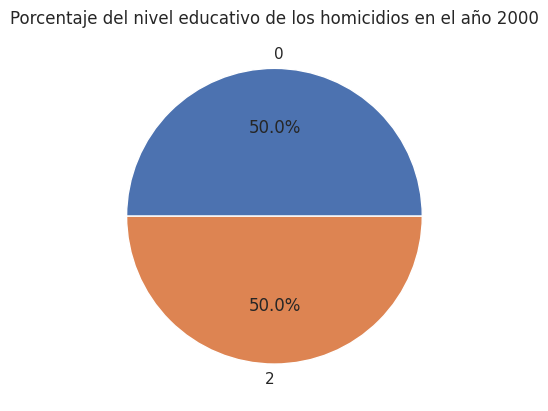

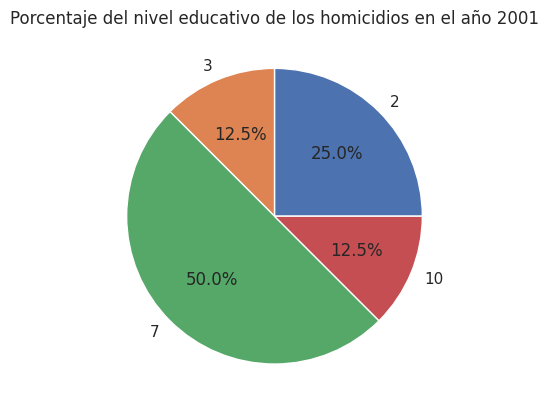

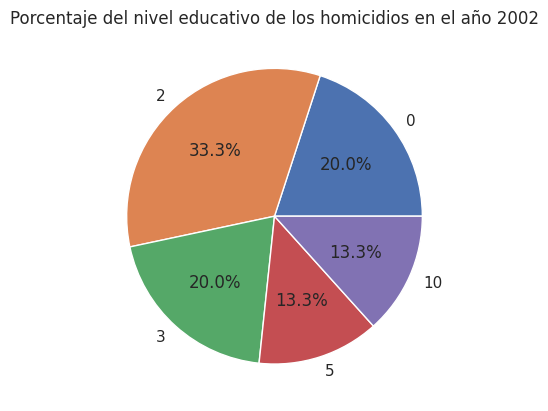

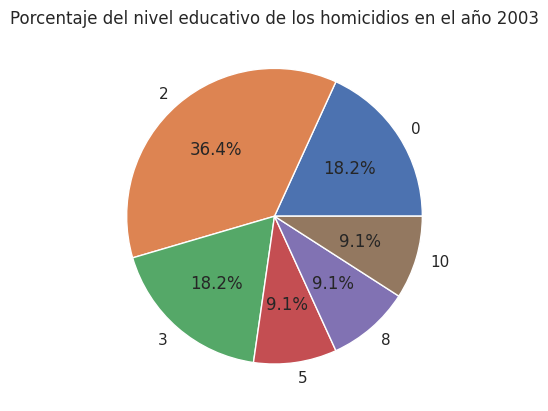

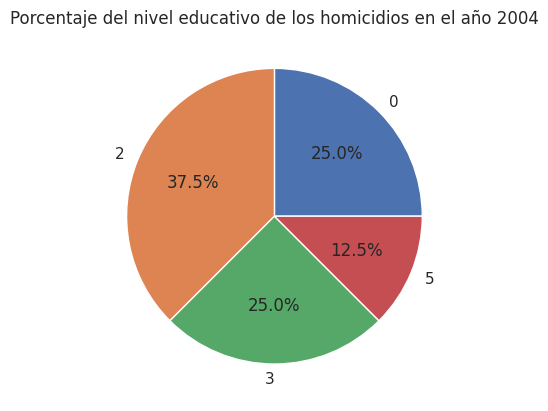

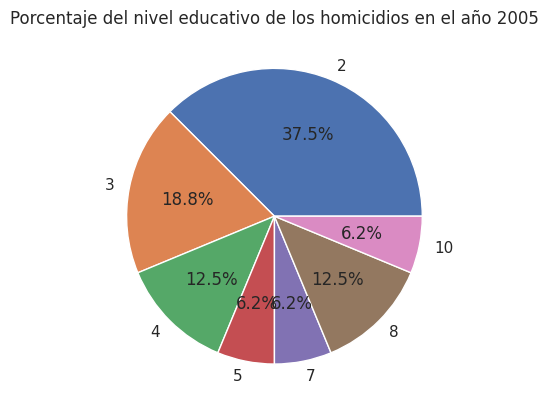

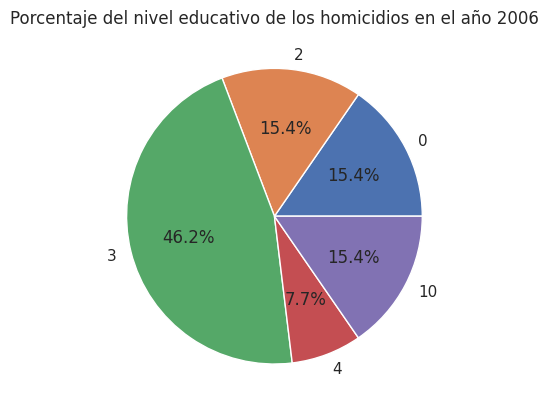

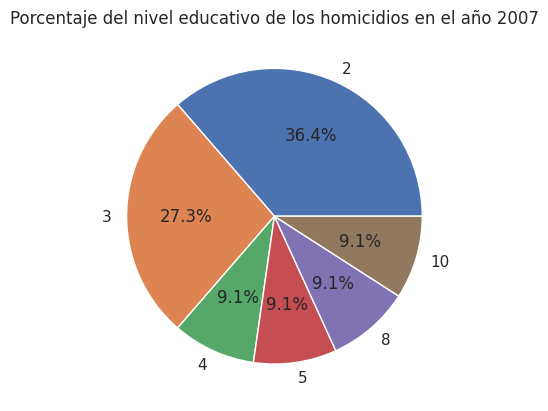

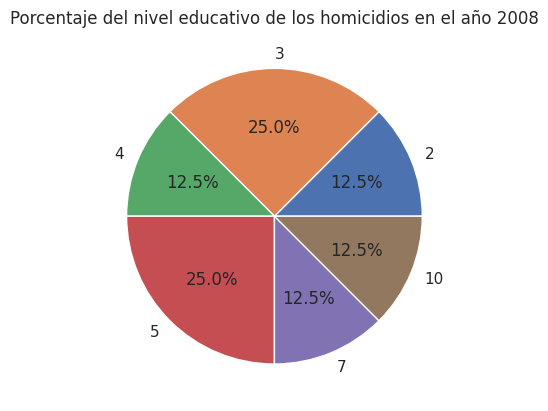

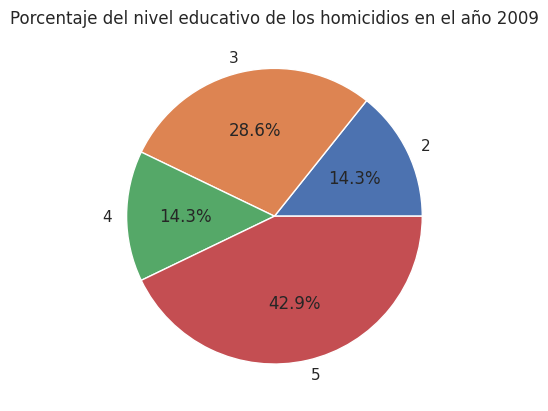

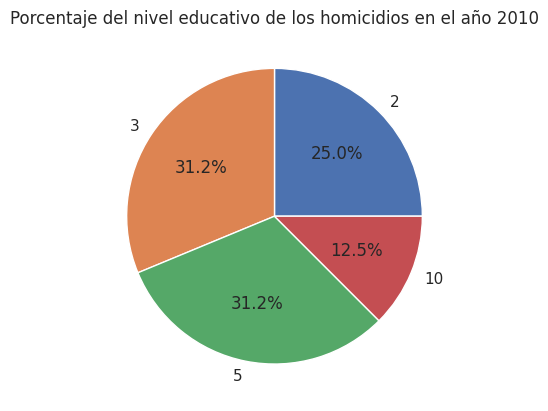

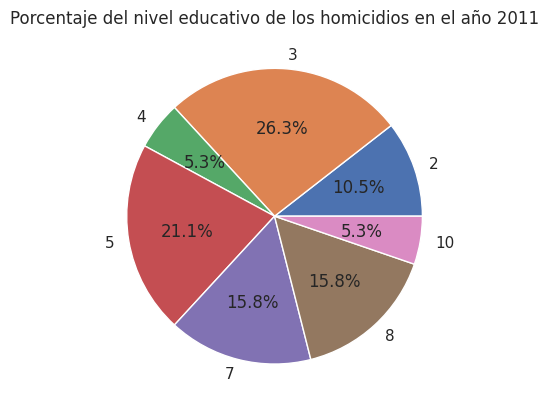

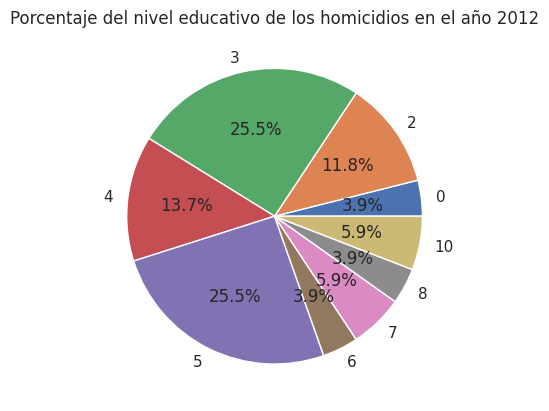

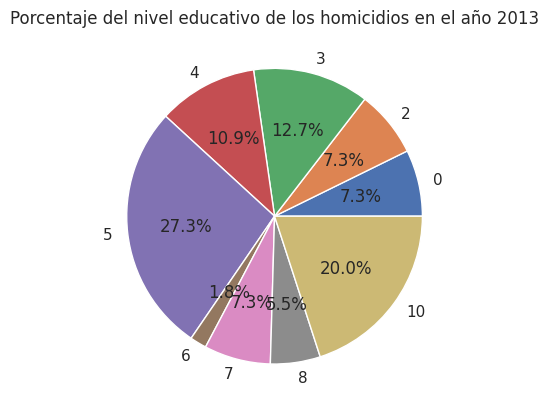

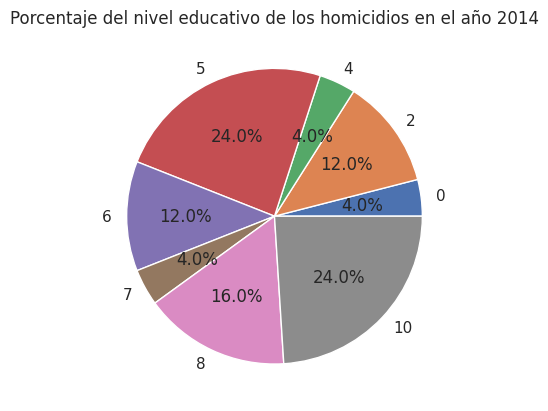

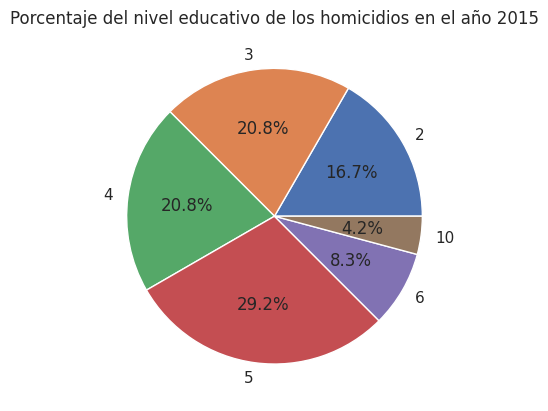

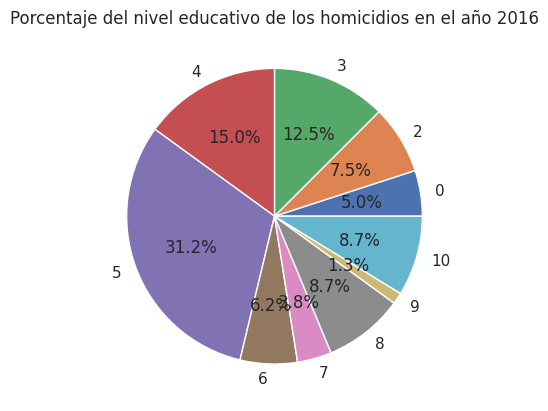

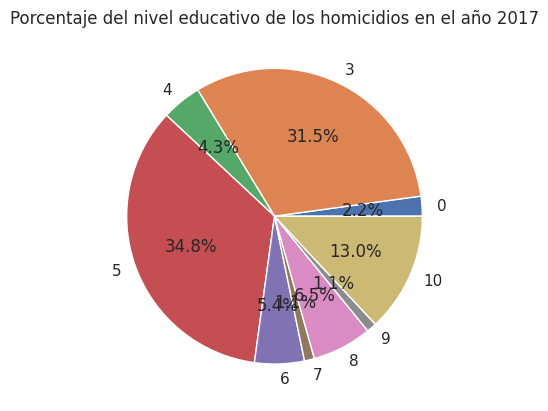

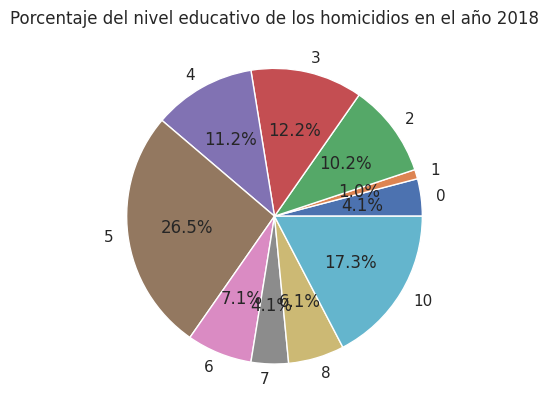

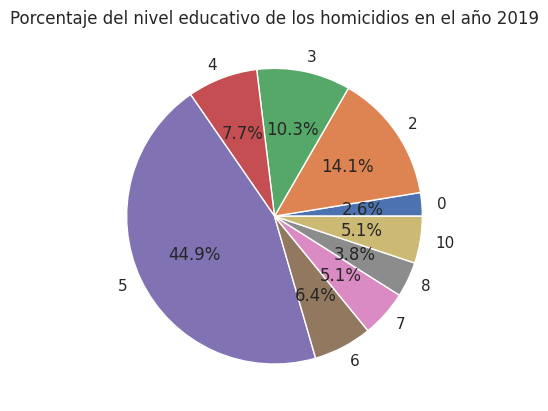

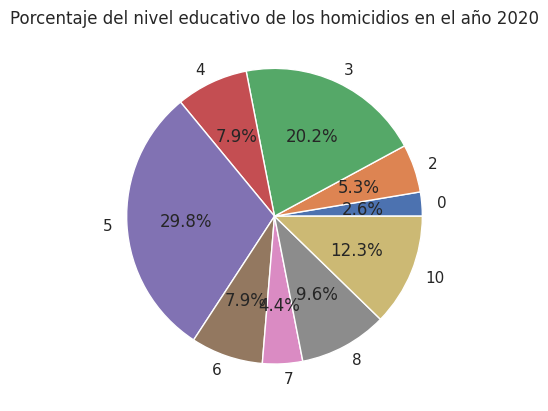

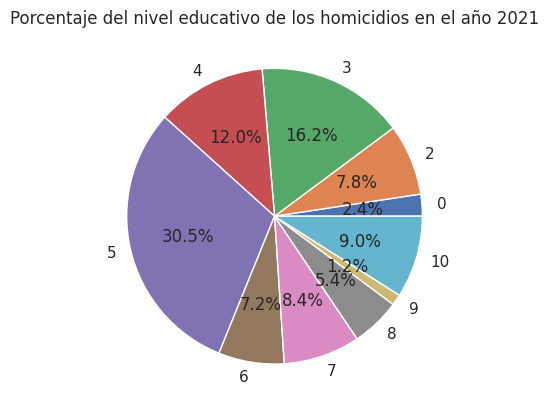

In [ ]:
# Iterar sobre los años y crear una gráfica circular para cada uno
for year in df_Zaca['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Zaca.loc[df_Zaca['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()

##Chihuahua

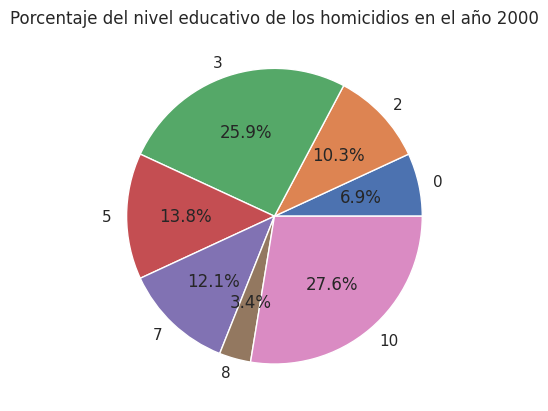

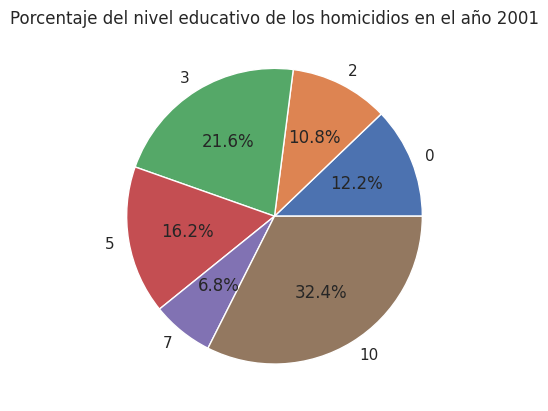

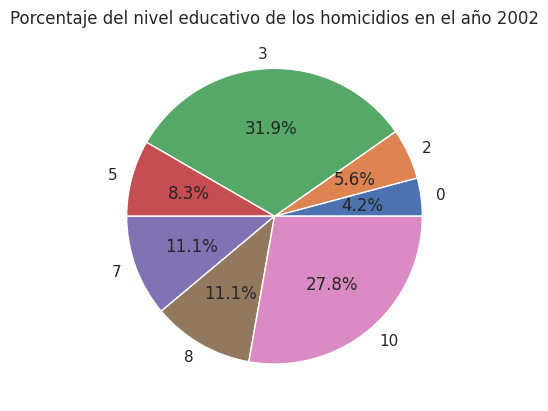

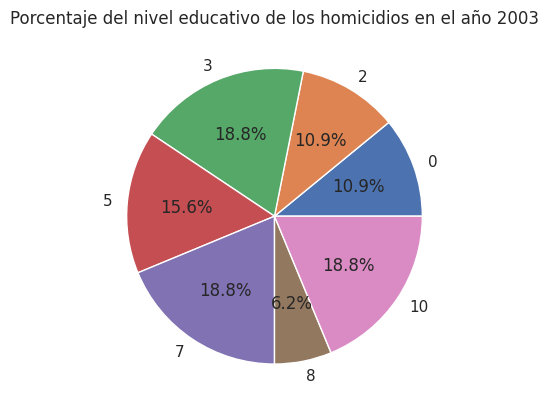

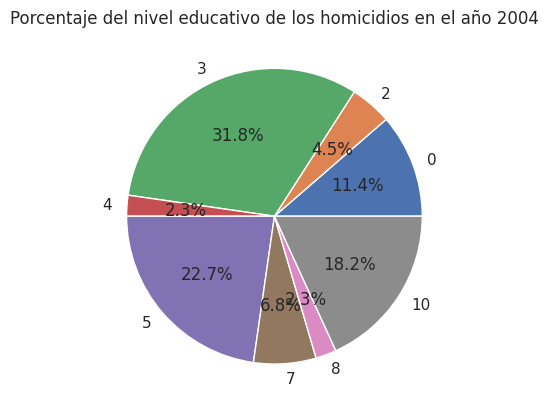

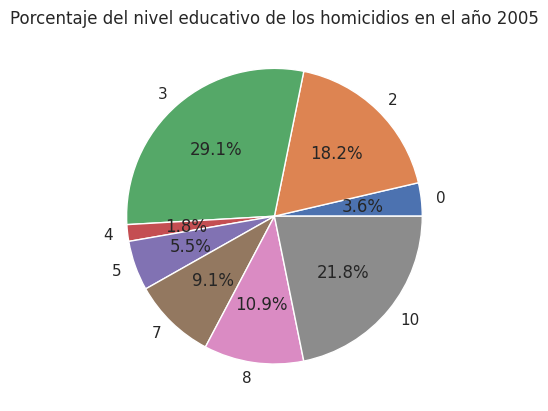

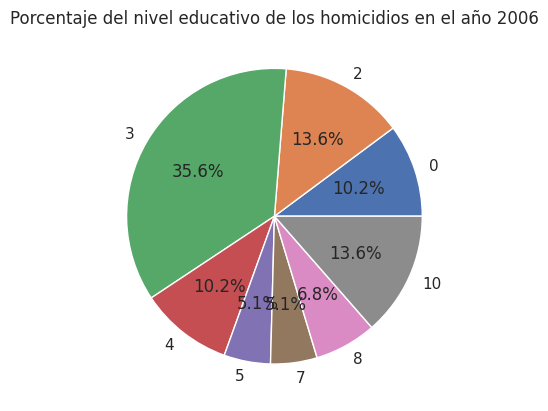

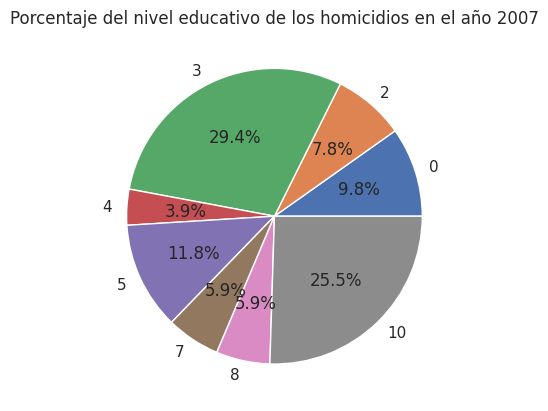

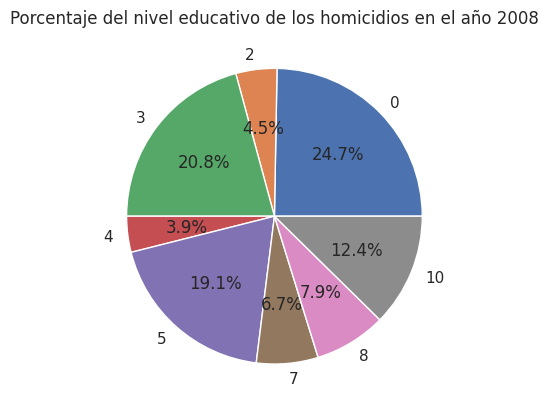

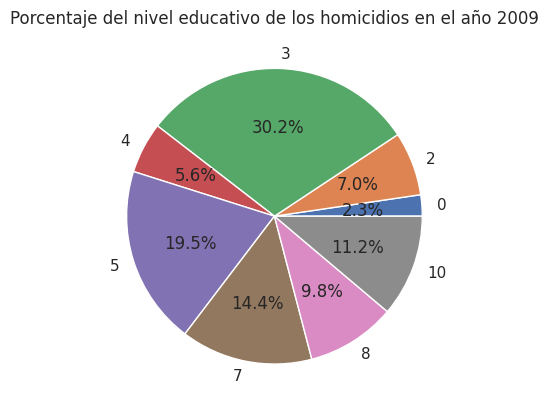

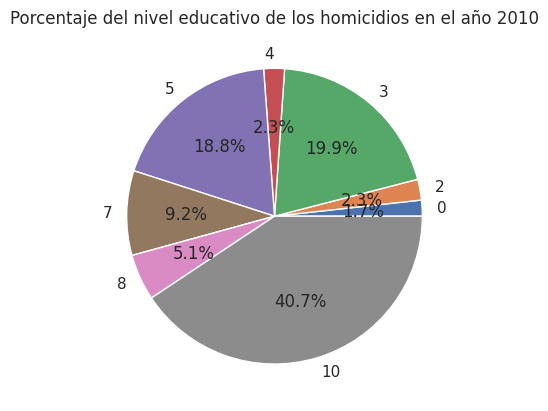

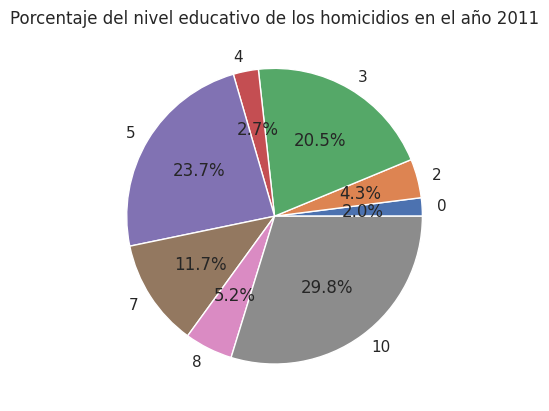

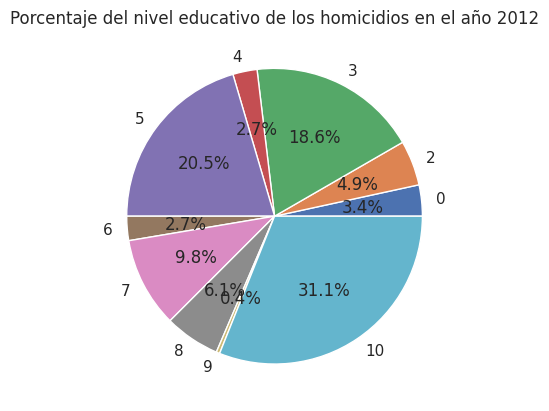

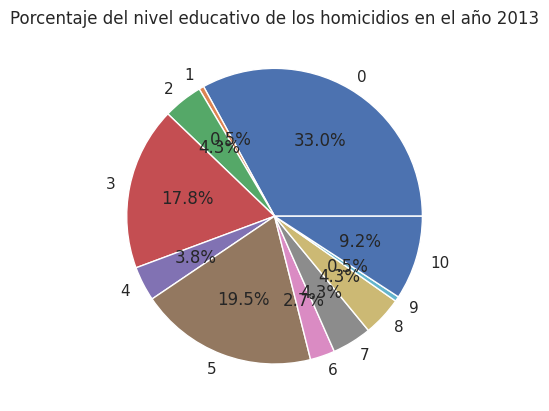

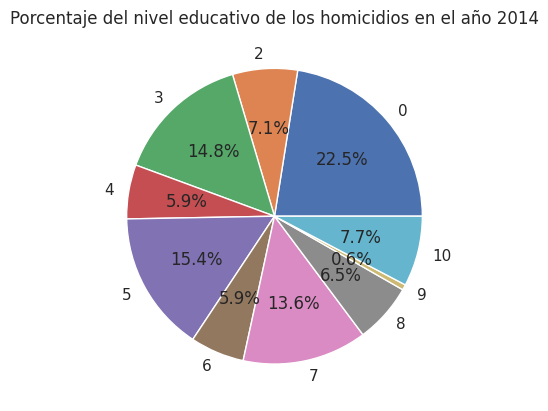

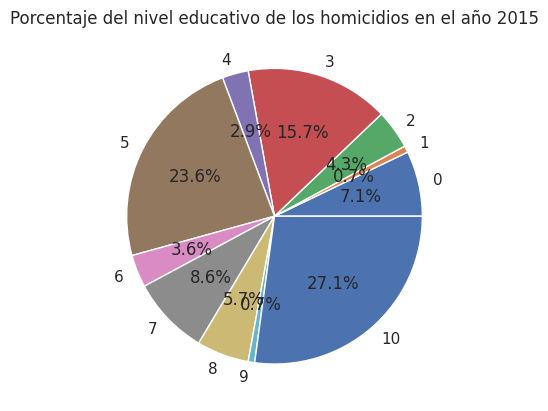

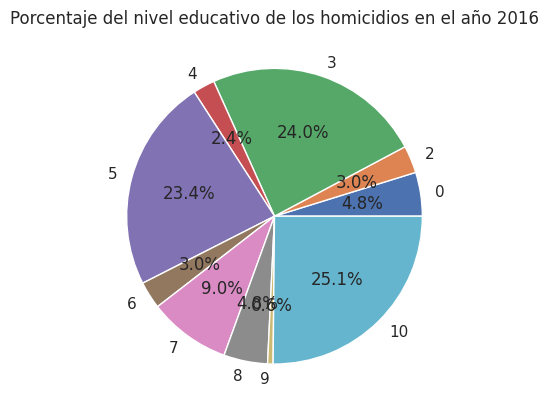

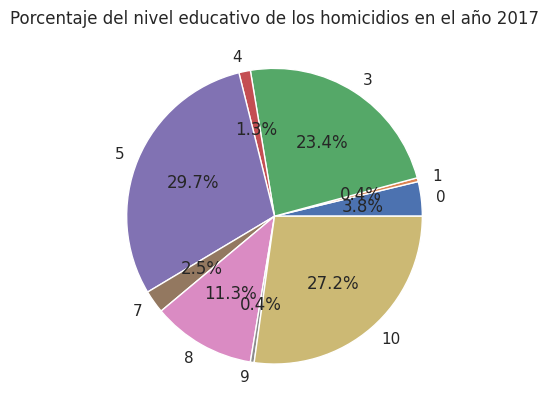

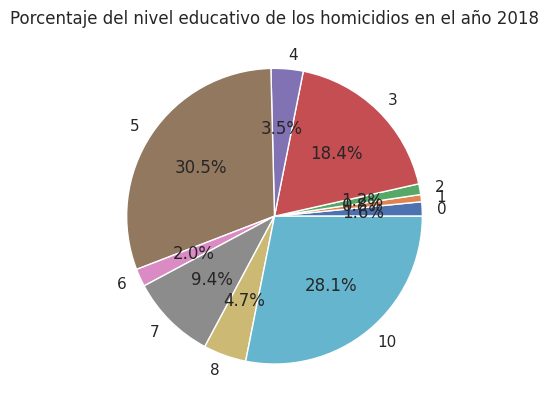

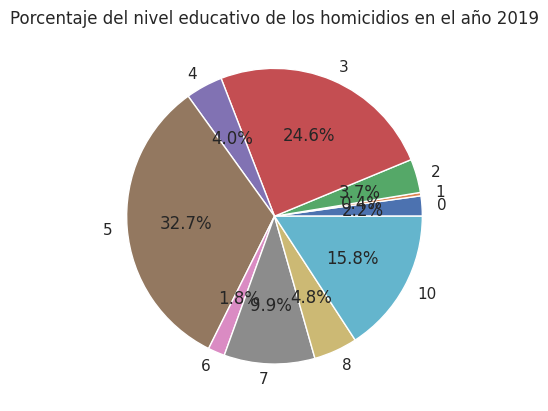

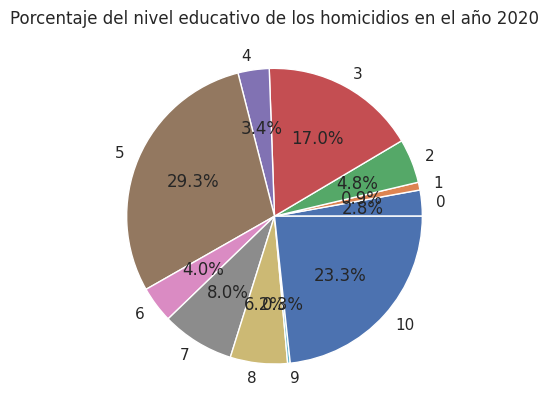

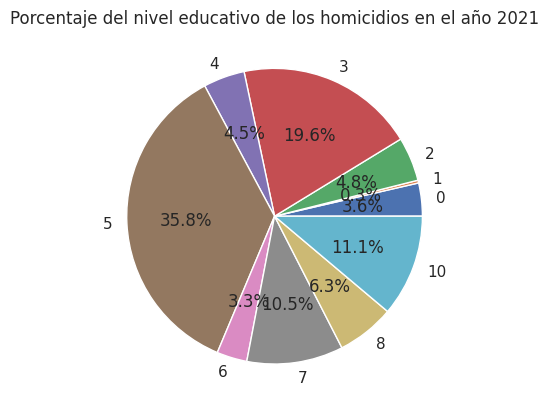

In [ ]:
df_Chihuahua=df_altos.copy()
Chihuahua = ['Chihuahua']
# filtrar el dataframe por los estados deseados
df_Chihuahua = df_Chihuahua[df_Chihuahua['EDO'].isin(Chihuahua)]
# Iterar sobre los años y crear una gráfica circular para cada uno
for year in df_Chihuahua['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Chihuahua.loc[df_Chihuahua['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()

##GUANAJUATO

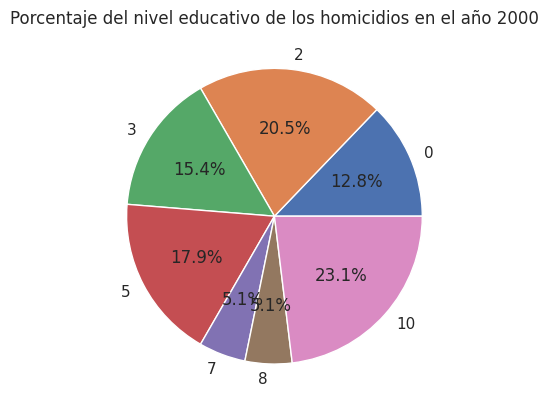

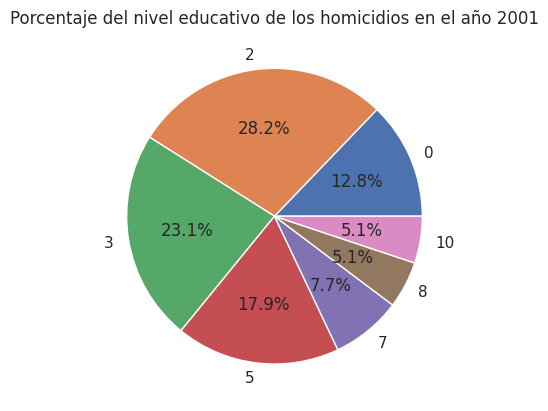

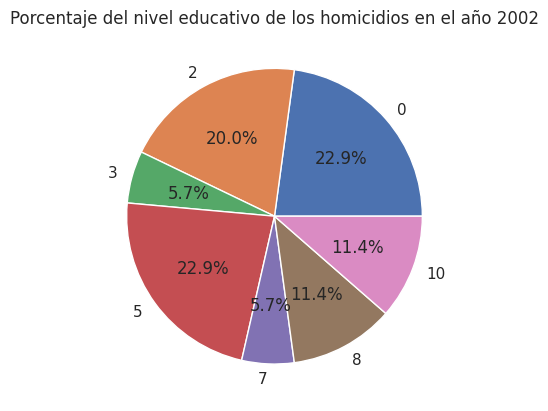

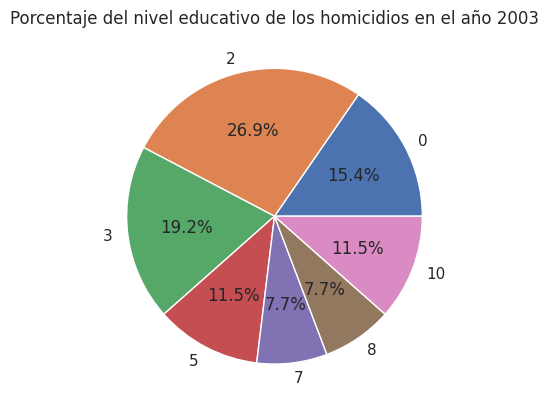

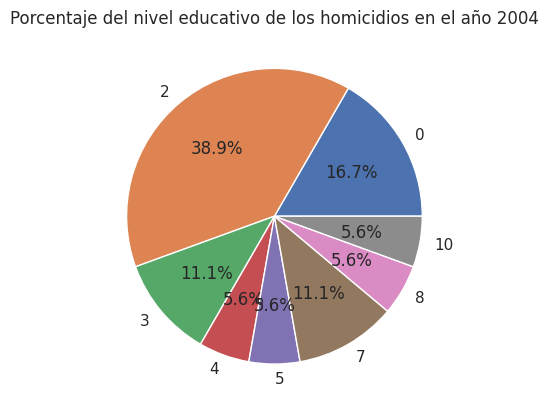

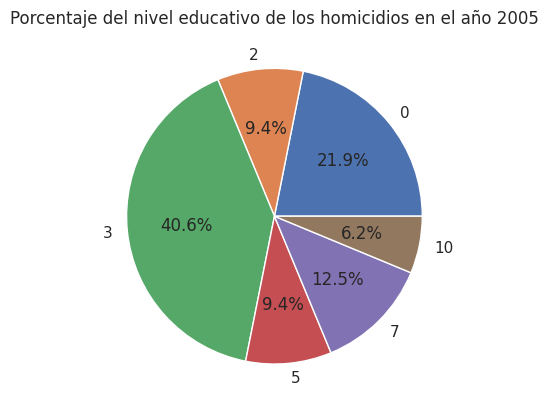

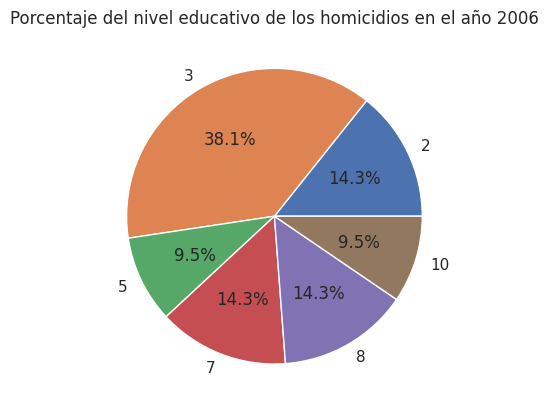

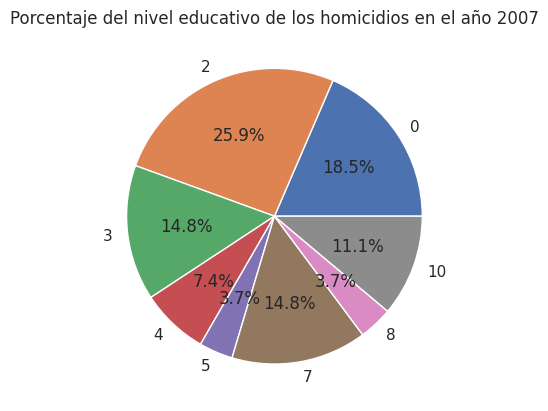

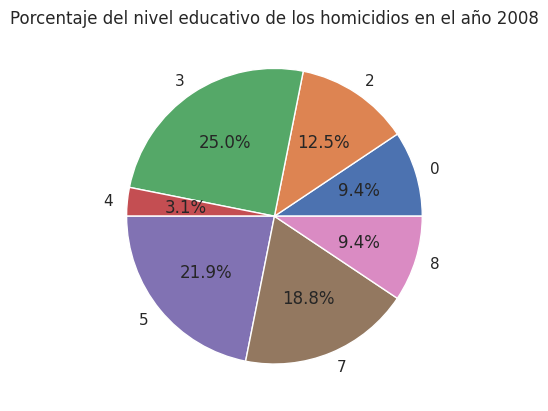

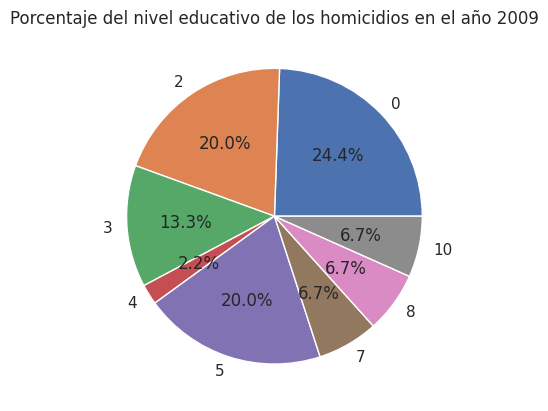

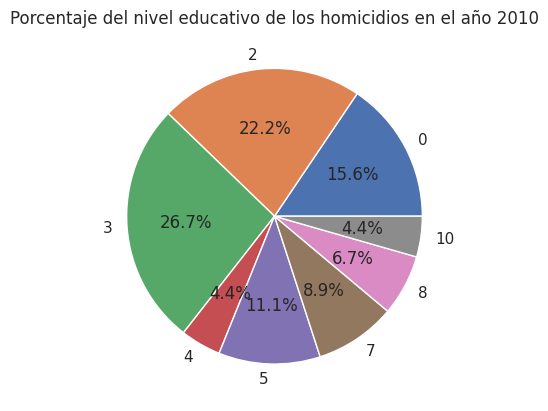

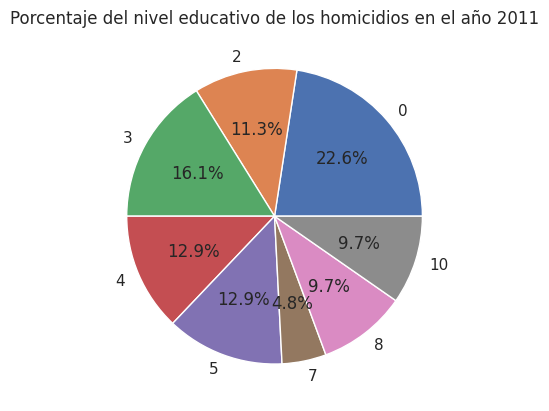

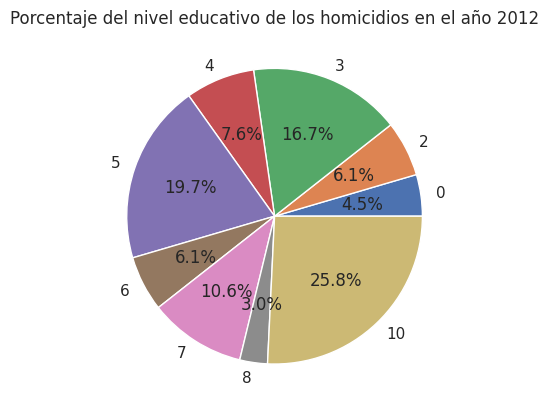

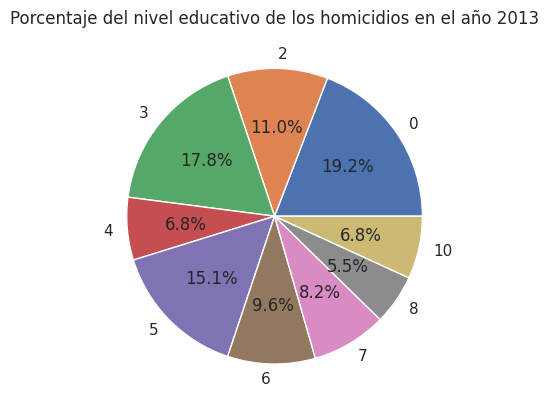

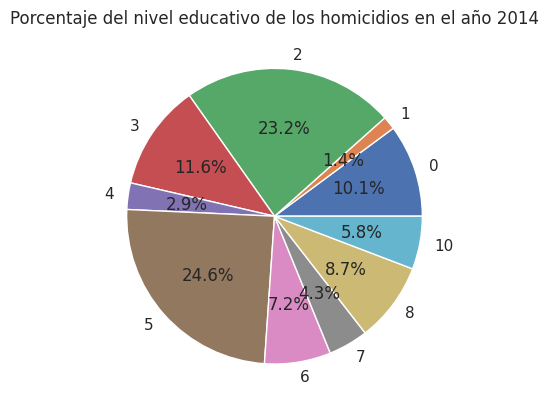

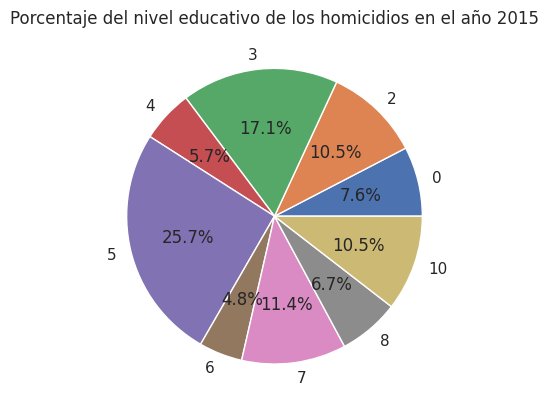

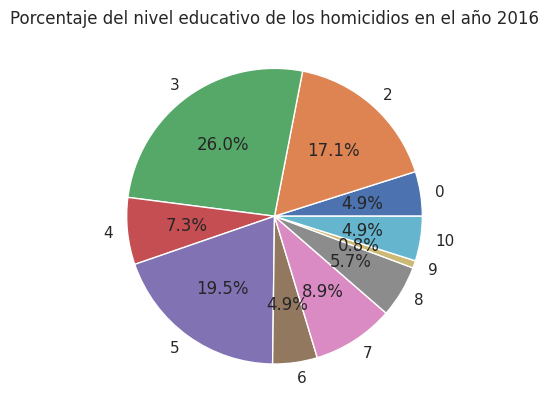

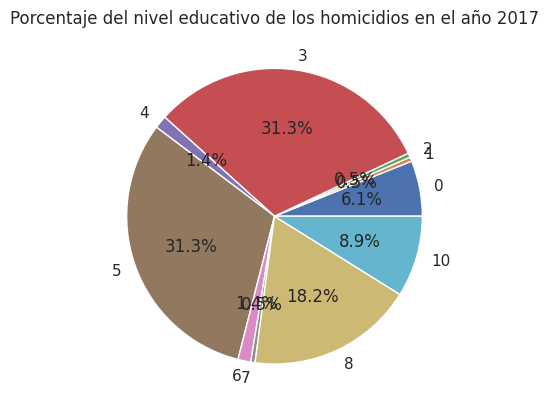

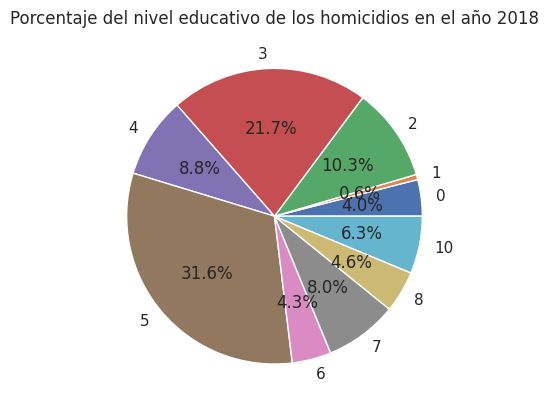

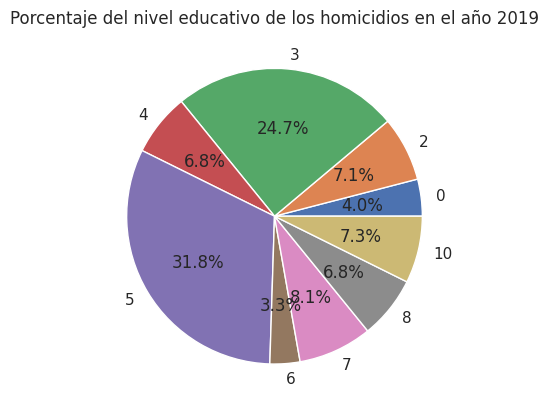

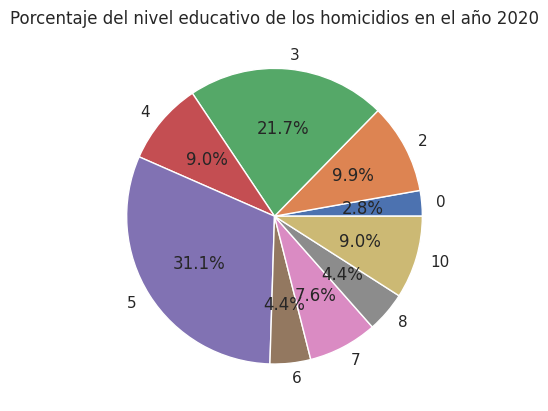

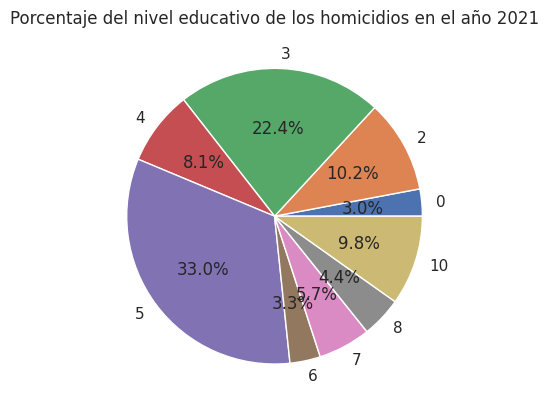

In [14]:
df_Guanajuato=df_altos.copy()
Guanajuato = ['Guanajuato']
# filtrar el dataframe por los estados deseados
df_Guanajuato = df_Guanajuato[df_Guanajuato['EDO'].isin(Guanajuato)]
# Iterar sobre los años y crear una gráfica circular para cada uno
for year in df_Guanajuato['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Guanajuato.loc[df_Guanajuato['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()

##GUERRERO

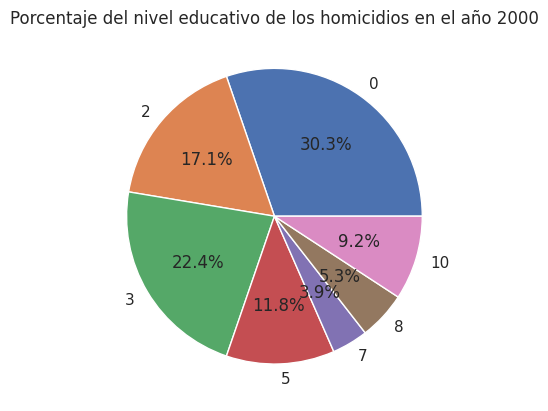

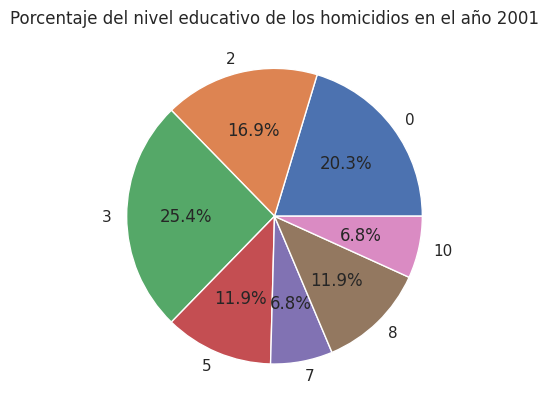

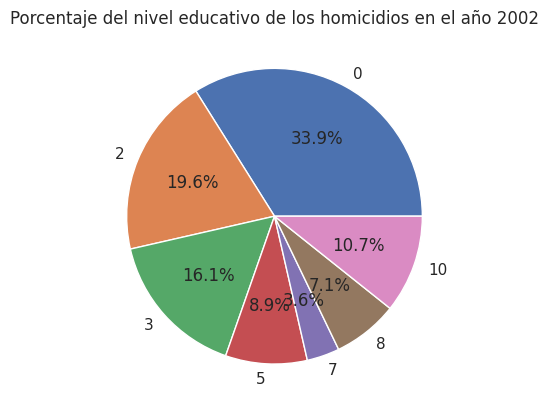

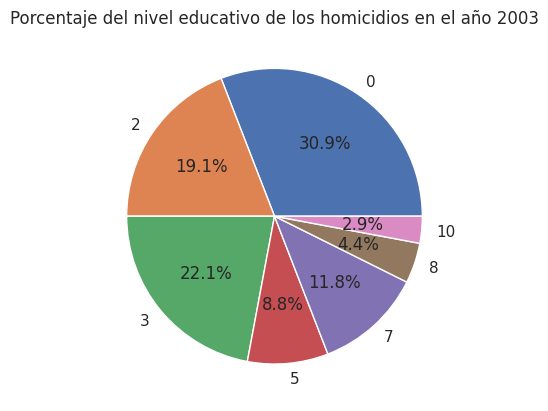

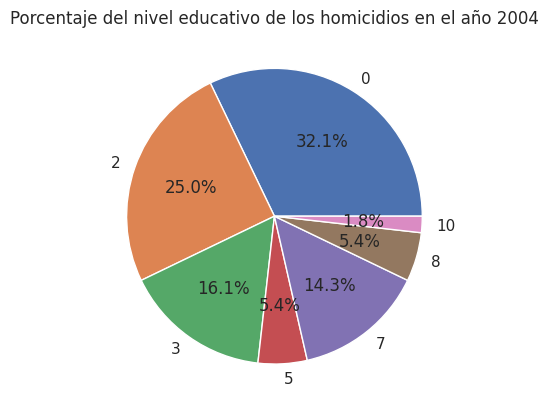

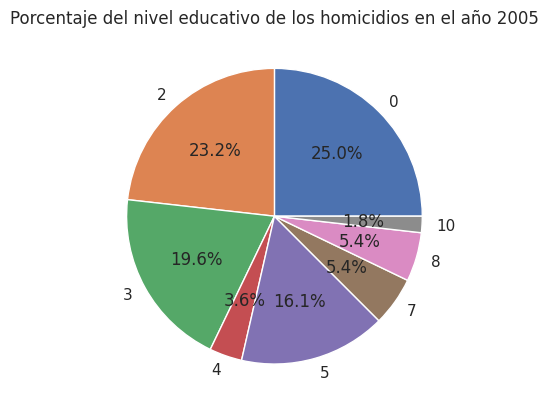

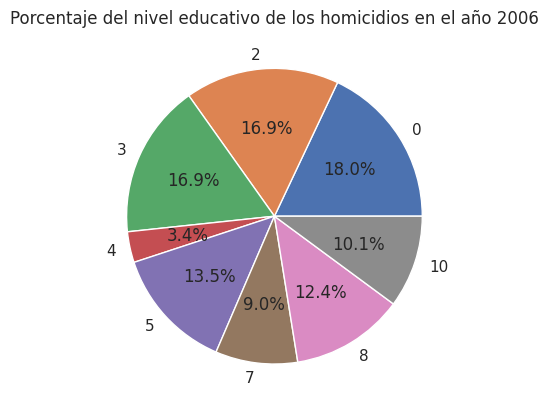

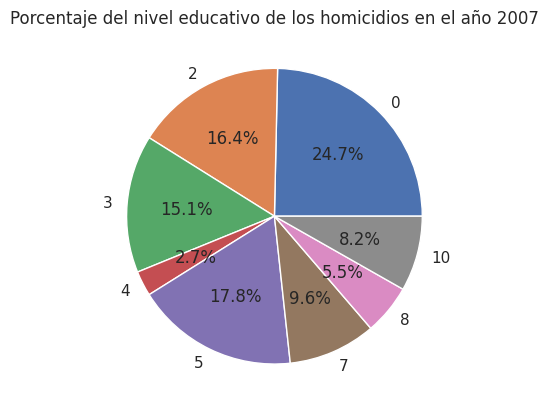

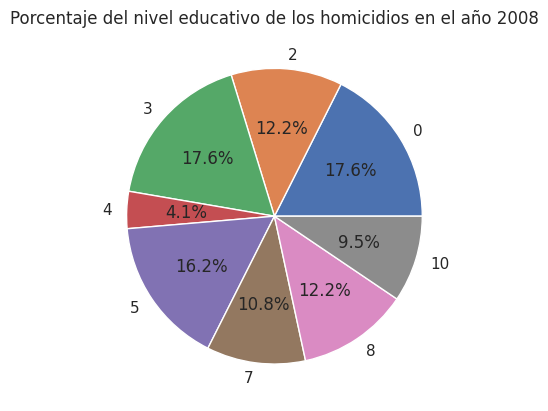

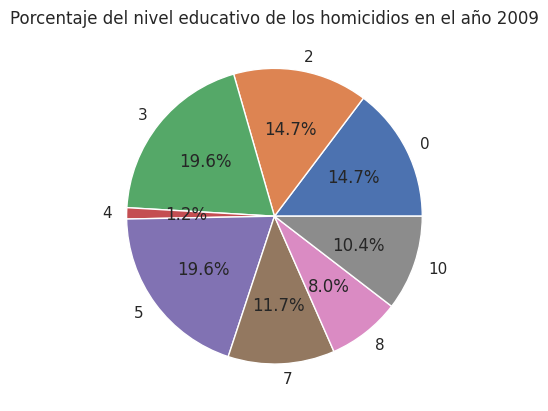

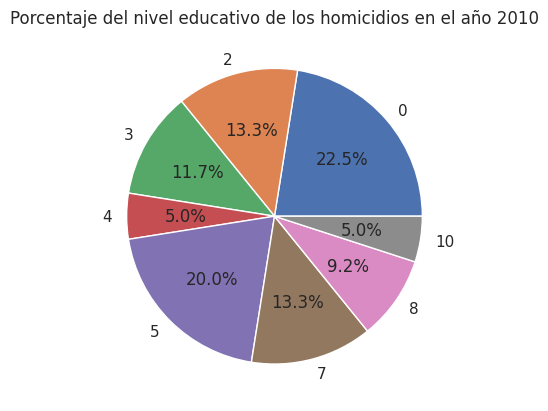

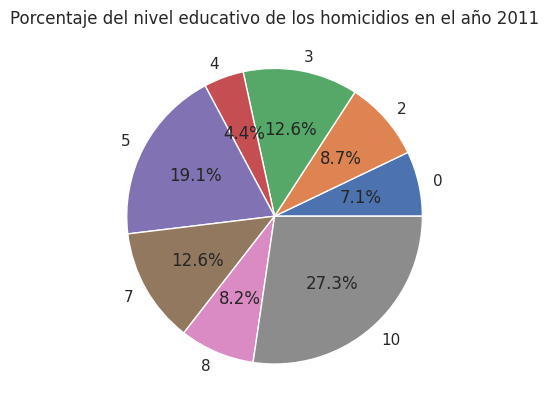

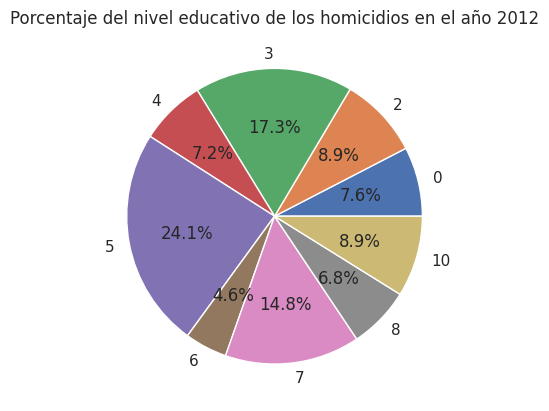

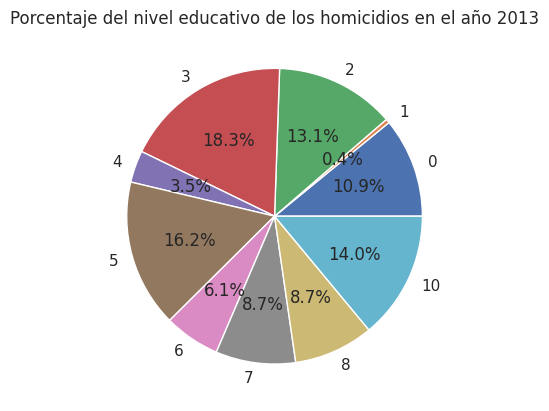

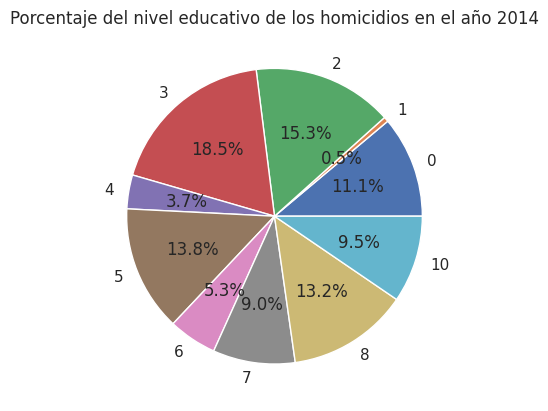

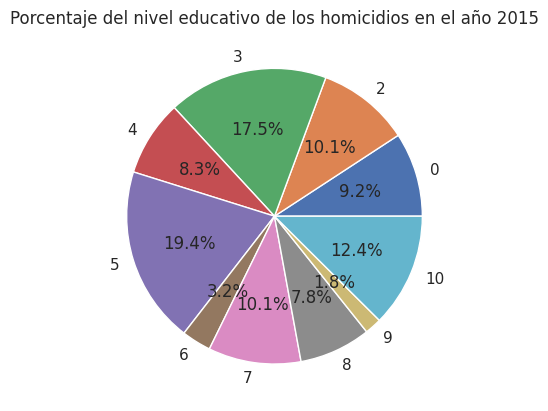

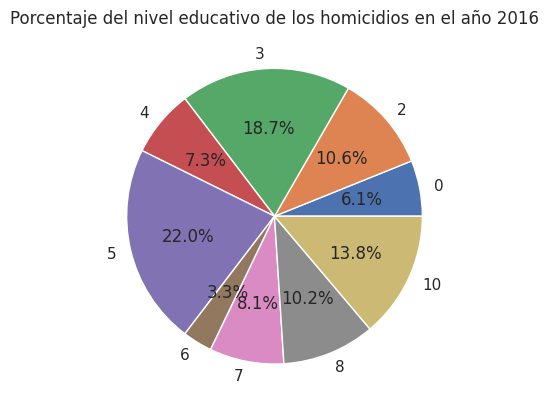

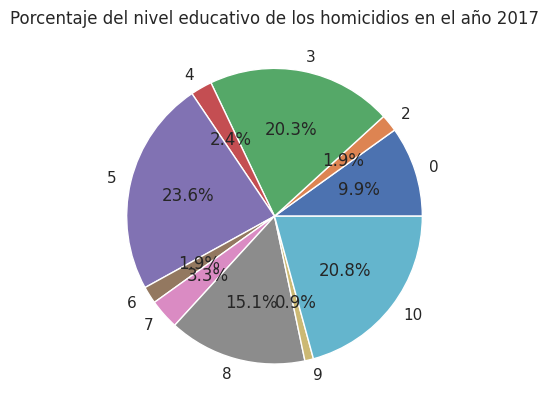

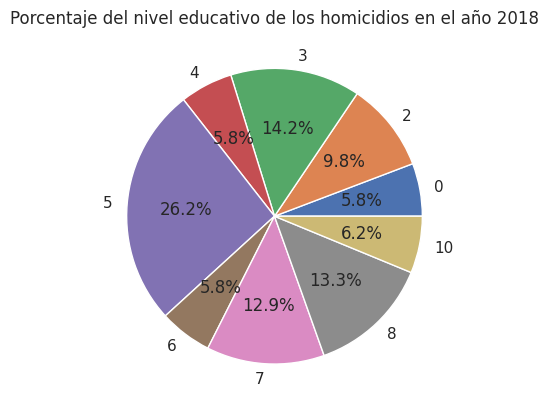

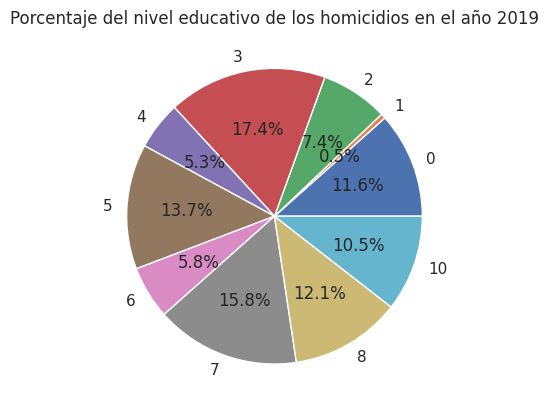

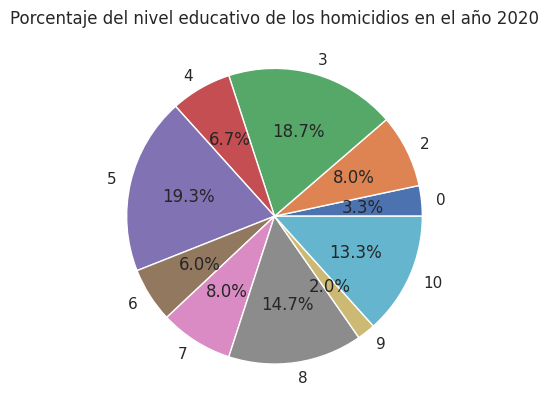

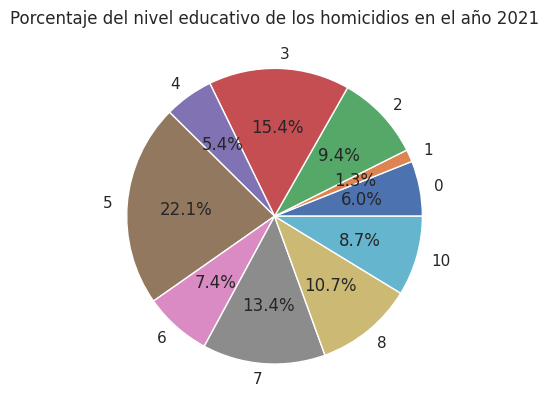

In [ ]:
df_Guerrero=df_altos.copy()
Guerrero = ['Guerrero']
# filtrar el dataframe por los estados deseados
df_Guerrero = df_Guerrero[df_Guerrero['EDO'].isin(Guerrero)]
# filtrar el dataframe por los estados deseados
for year in df_Guerrero['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Guerrero.loc[df_Guerrero['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()

##Colima

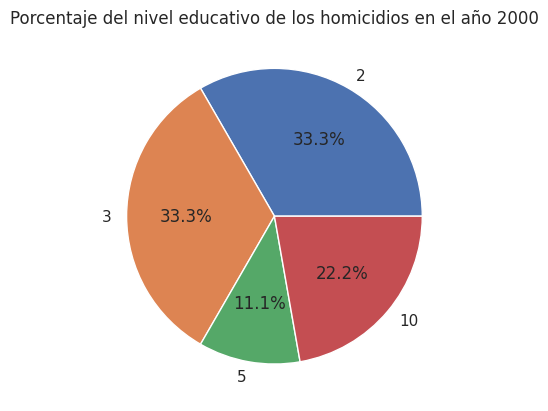

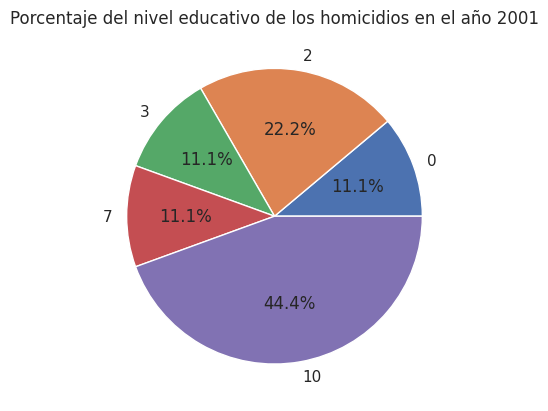

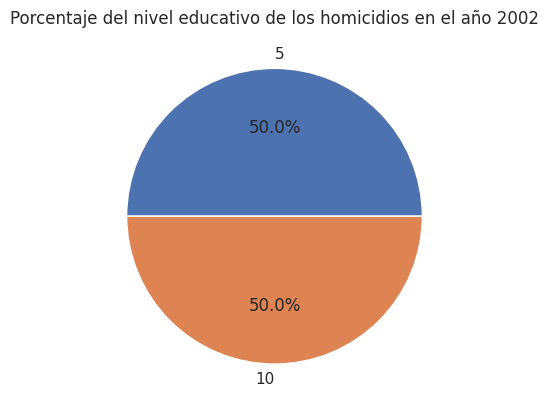

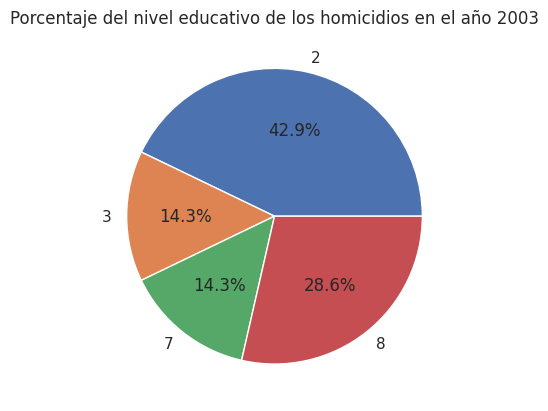

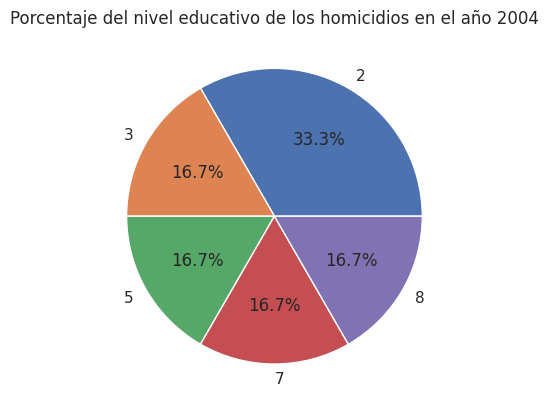

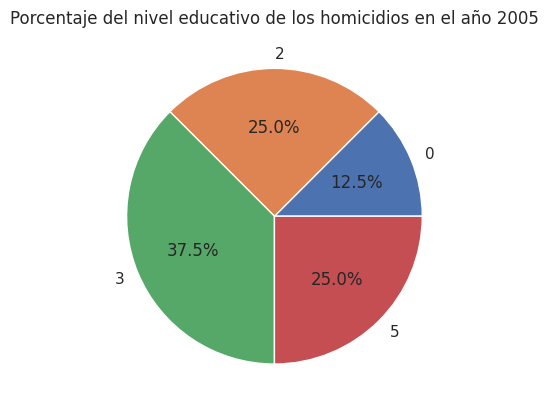

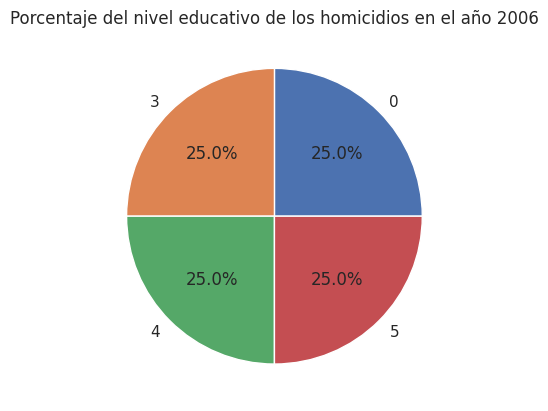

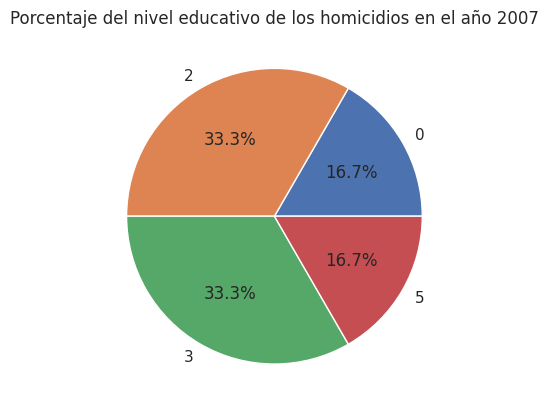

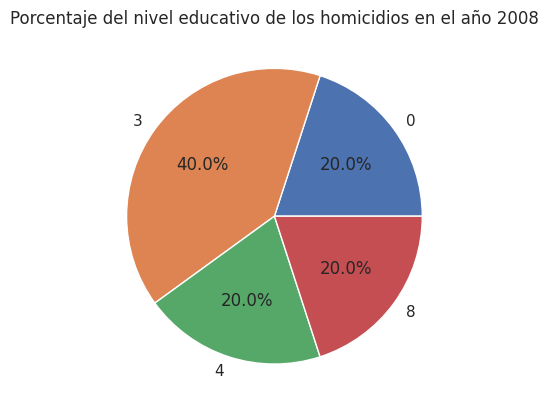

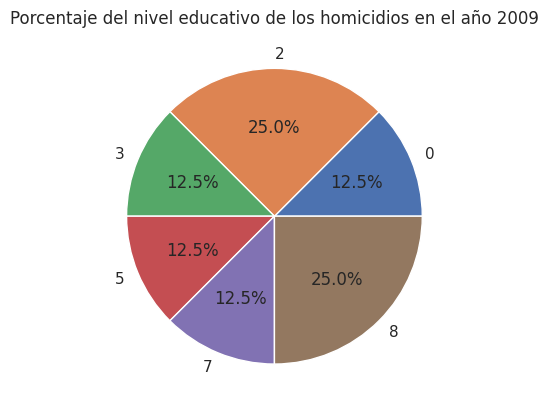

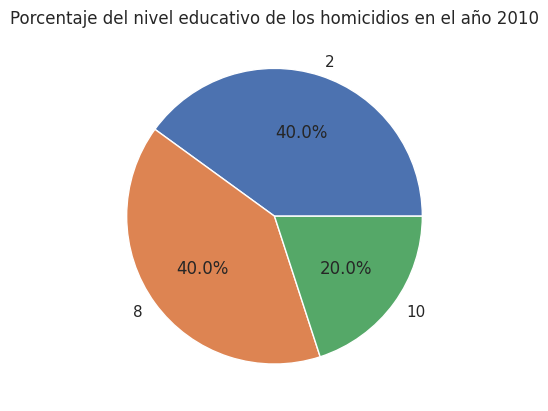

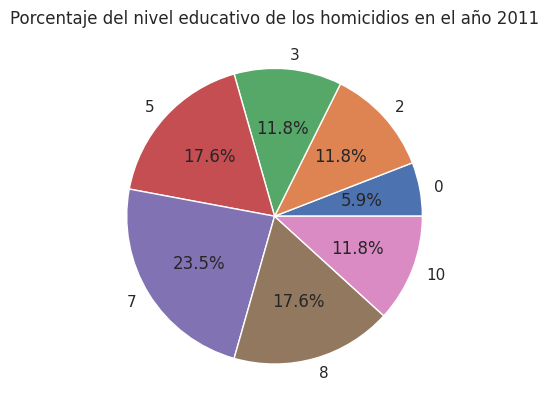

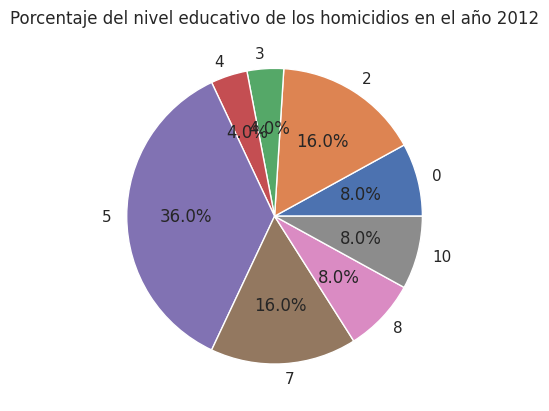

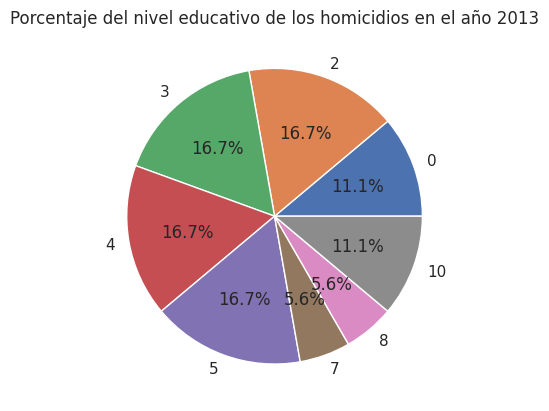

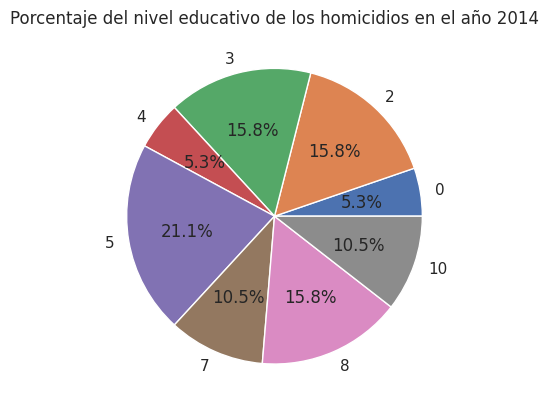

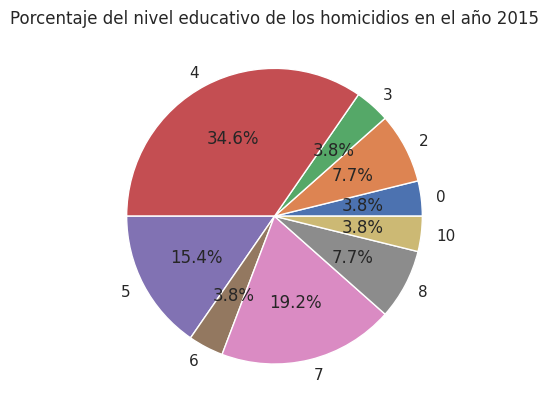

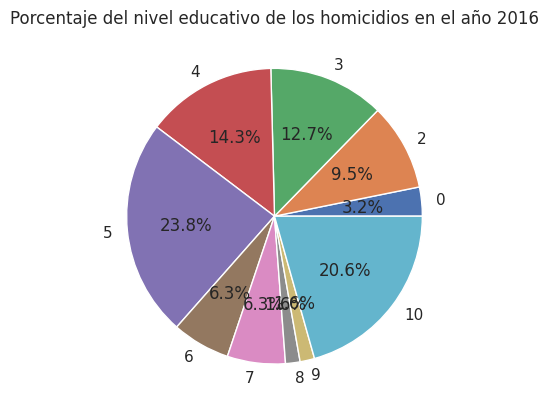

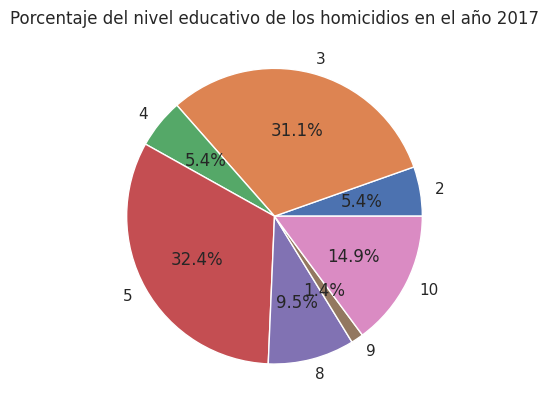

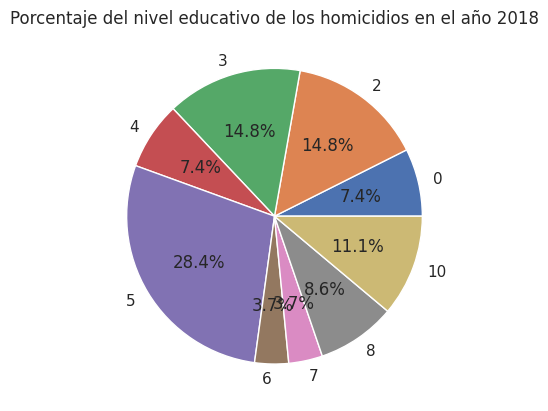

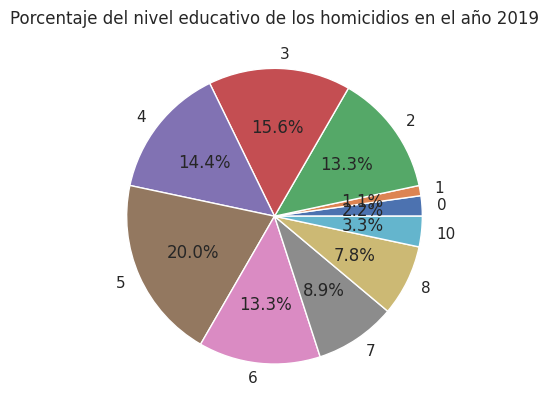

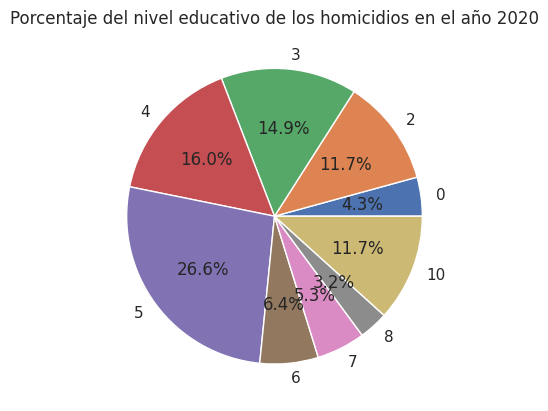

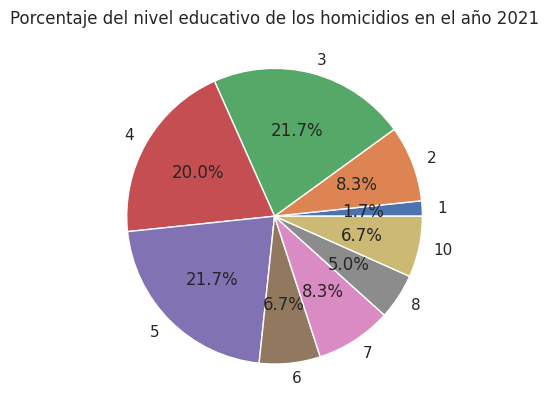

In [ ]:
df_Colima=df_altos.copy()
Colima = ['Colima']
# filtrar el dataframe por los estados deseados
df_Colima = df_Colima[df_Colima['EDO'].isin(Colima)]
# filtrar el dataframe por los estados deseados
for year in df_Colima['AÑO'].unique():
    # Seleccionar los datos para un solo año
    year_data = df_Colima.loc[df_Colima['AÑO'] == year]
    
    # Verificar si hay porcentajes diferentes a cero
    if any(year_data['Mujer'] != 0):
        # Crear una figura y un eje
        fig, ax = plt.subplots()
        
        # Filtrar los datos que tienen porcentaje diferente a cero
        non_zero_data = year_data[year_data['Mujer'] != 0]
        
        # Crear la gráfica circular
        ax.pie(non_zero_data['Mujer'], labels=non_zero_data['ESCOLARIDAD'], autopct='%1.1f%%')
        ax.set_title(f'Porcentaje del nivel educativo de los homicidios en el año {year}')
        
        # Mostrar la gráfica
        plt.show()